In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter
from converter_to_RUB_2 import convert_to_rub


#### загружаем и объединяем датасеты

In [10]:

# hh Николай

hh_df = pd.read_excel('data/hh_all_IT_53052_vacancies_with_text_08062025.xlsx')

display(hh_df.head())
display(hh_df.info())



,ID,country,position,date,vacancy,company,city,employment,employment.1,schedule,salary from,salary to,currency,skills,url,industry,experience,text
0,121197568,Казахстан,"BI-аналитик, аналитик данных",2025-06-08T06:56:41+0300,Дата-аналитик,Центр электронной коммерции,Астана,Полная занятость,Полная занятость,Удаленная работа,NaN,NaN,NaN,"SQL, A/A тесты, A/B тесты, Python, Power BI, A...",https://hh.ru/vacancy/121197568,NaN,NaN,Что нужно делать:\n \n \nНастраивать сбор и па...
1,121194799,Казахстан,"BI-аналитик, аналитик данных",2025-06-07T22:54:23+0300,Аналитик данных,Коллекторское агентство Kaz Collect,Алматы,Полная занятость,Полная занятость,Полный день,300000.0,NaN,KZT,NaN,https://hh.ru/vacancy/121194799,NaN,NaN,Kaz Collect\n — стабильная и развивающаяся кол...
2,120346215,Казахстан,"BI-аналитик, аналитик данных",2025-06-07T14:11:48+0300,Главный специалист в Управление разработки и п...,АО «Freedom Bank Kazakhstan»,Алматы,Полная занятость,Полная занятость,Полный день,NaN,NaN,NaN,NaN,https://hh.ru/vacancy/120346215,NaN,NaN,Обязанности:\n \n \nРазработка и поддержка мик...
3,118951934,Казахстан,"BI-аналитик, аналитик данных",2025-06-07T13:53:37+0300,Аналитик данных,Ломбард Деньги населению,Костанай,Полная занятость,Полная занятость,Полный день,NaN,NaN,NaN,"SQL, Работа с базами данных, Основы баз данных",https://hh.ru/vacancy/118951934,NaN,NaN,"Компания ищет специалиста, способного умело ра..."
4,118984811,Казахстан,"BI-аналитик, аналитик данных",2025-06-06T16:21:52+0300,FP&A Specialist,ТЕВА,Алматы,Полная занятость,Полная занятость,Полный день,NaN,NaN,NaN,"Business English, P&L, Financial Analysis, Ana...",https://hh.ru/vacancy/118984811,NaN,NaN,RESPONSIBILITIES:\n \n \nParticipating in FP&A...


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53052 entries, 0 to 53051
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ID            53052 non-null  int64  
 1   country       7591 non-null   object 
 2   position      53052 non-null  object 
 3   date          53052 non-null  object 
 4   vacancy       53052 non-null  object 
 5   company       53052 non-null  object 
 6   city          53052 non-null  object 
 7   employment    53052 non-null  object 
 8   employment.1  53052 non-null  object 
 9   schedule      53052 non-null  object 
 10  salary from   17974 non-null  float64
 11  salary to     11409 non-null  float64
 12  currency      20285 non-null  object 
 13  skills        30946 non-null  object 
 14  url           53052 non-null  object 
 15  industry      45461 non-null  object 
 16  experience    45461 non-null  object 
 17  text          53044 non-null  object 
dtypes: float64(2), int64(1), o

None

In [11]:
hh_df[~hh_df['salary to'].isna() | ~hh_df['salary from'].isna()].count()/hh_df.shape[0]*100

ID              38.236070
country          4.944206
position        38.236070
date            38.236070
vacancy         38.236070
company         38.236070
city            38.236070
employment      38.236070
employment.1    38.236070
schedule        38.236070
salary from     33.879967
salary to       21.505316
currency        38.236070
skills          24.053759
url             38.236070
industry        33.291865
experience      33.291865
text            38.226646
dtype: float64

In [12]:
display(hh_df['position'].value_counts().head(50))
display(hh_df['position'].value_counts().shape[0])

position
Программист, разработчик                        11937
Специалист технической поддержки                 6119
Руководитель проектов                            4448
Дизайнер, художник                               3940
Системный администратор                          3843
Аналитик                                         3705
Специалист по информационной безопасности        2994
Менеджер продукта                                2121
Тестировщик                                      1865
Бизнес-аналитик                                  1576
Системный аналитик                               1460
BI-аналитик, аналитик данных                     1339
DevOps-инженер                                   1203
Руководитель группы разработки                    942
Сетевой инженер                                   926
Системный инженер                                 918
Методолог                                         863
Дата-сайентист                                    657
Технический директо

25

In [13]:
# hh Шахен

hh_other_df = pd.read_excel('data/hh_Drugie.xlsx')




In [14]:
display(hh_other_df.head())
display(hh_other_df.info())


,ID,professional_role,Дата публикации,Название,Компания,Город,Формат работы,Опыт,Занятость,График,Зарплата от,Зарплата до,Валюта,Ключевые навыки,URL
0,121332403,"BI-аналитик, аналитик данных",2025-06-04T12:14:48+0300,Quant analyst / Quant researcher,ProfIT Family,Кипр,Полная занятость,От 1 года до 3 лет,Полная занятость,Полный день,NaN,NaN,NaN,NaN,https://hh.ru/vacancy/121332403
1,121322932,"BI-аналитик, аналитик данных",2025-06-04T10:10:59+0300,System Analyst,Netevia,Сербия,Полная занятость,От 1 года до 3 лет,Полная занятость,Удаленная работа,NaN,NaN,NaN,"SQL, analyst, SDLC, Software Development, Paym...",https://hh.ru/vacancy/121322932
2,121309538,"BI-аналитик, аналитик данных",2025-06-03T21:49:12+0300,"E-commerce Data Analyst (Amazon, Walmart)",SOT LLC,США,Полная занятость,От 1 года до 3 лет,Полная занятость,Удаленная работа,1000.0,1300.0,USD,"Исследовательский анализ данных, Визуализация ...",https://hh.ru/vacancy/121309538
3,121097245,"BI-аналитик, аналитик данных",2025-06-03T17:23:40+0300,Business/Data Analyst,Uspio LTD,Кипр,Полная занятость,От 3 до 6 лет,Полная занятость,Полный день,NaN,NaN,NaN,"Analysis, API, MS Excel, Power BI, Tableau, An...",https://hh.ru/vacancy/121097245
4,115438956,"BI-аналитик, аналитик данных",2025-06-03T15:43:16+0300,BI Analyst (Tableau),STARTRIBE LTD,Кипр,Полная занятость,От 3 до 6 лет,Полная занятость,Полный день,NaN,NaN,NaN,"SQL, Tableau",https://hh.ru/vacancy/115438956


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 651 entries, 0 to 650
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 651 non-null    int64  
 1   professional_role  651 non-null    object 
 2   Дата публикации    651 non-null    object 
 3   Название           651 non-null    object 
 4   Компания           651 non-null    object 
 5   Город              651 non-null    object 
 6   Формат работы      651 non-null    object 
 7   Опыт               651 non-null    object 
 8   Занятость          651 non-null    object 
 9   График             651 non-null    object 
 10  Зарплата от        121 non-null    float64
 11  Зарплата до        86 non-null     float64
 12  Валюта             143 non-null    object 
 13  Ключевые навыки    461 non-null    object 
 14  URL                651 non-null    object 
dtypes: float64(2), int64(1), object(12)
memory usage: 76.4+ KB


None

In [15]:
# приводим к одному словарю признаков

column_mapping = {
    'Название': 'vacancy',
    'Компания': 'company',
    'Город': 'city',
    'Опыт': 'experience',
    'Занятость': 'employment',
    'График': 'schedule',
    'Зарплата от': 'salary from',
    'Зарплата до': 'salary to',
    'Валюта': 'currency',
    'Ключевые навыки': 'skills',
    'URL': 'url',
    'Дата публикации': 'date',
    #'Уровень специалиста': 'level',
    #'требования': 'requirements',
    #'обязанности': 'responsibilities',
    'professional_role': 'position'
}

# Переименовываем столбцы
hh_other_df = hh_other_df.rename(columns=column_mapping)

In [16]:
hh_other_df= hh_other_df.drop(['ID','Формат работы'], axis = 1)

In [17]:
display(hh_other_df['position'].value_counts().head(50))
display(hh_other_df['position'].value_counts().shape[0])

position
Программист, разработчик                        210
Дизайнер, художник                               66
Гейм-дизайнер                                    35
Тестировщик                                      35
Менеджер продукта                                35
Специалист технической поддержки                 35
Руководитель проектов                            33
DevOps-инженер                                   31
Дата-сайентист                                   26
BI-аналитик, аналитик данных                     20
Аналитик                                         17
Руководитель группы разработки                   17
Технический директор (CTO)                       13
Системный администратор                          13
Бизнес-аналитик                                  12
Продуктовый аналитик                             11
Системный аналитик                               10
Системный инженер                                 7
Специалист по информационной безопасности         7
Рук

25

In [18]:
hh_other_df[~hh_other_df['salary to'].isna() | ~hh_other_df['salary from'].isna()].count()/hh_other_df.shape[0]*100

position       21.966206
date           21.966206
vacancy        21.966206
company        21.966206
city           21.966206
experience     21.966206
employment     21.966206
schedule       21.966206
salary from    18.586790
salary to      13.210445
currency       21.966206
skills         17.204301
url            21.966206
dtype: float64

In [19]:
# Настя superjob

superjob_df = pd.read_csv('data/superjob_2.csv')


In [20]:
#superjob_df = superjob_df.rename(columns={
#    'salary_from': 'salary from',
#    'salary_to': 'salary to'
#})

In [21]:
superjob_df[~superjob_df['salary to'].isna() | ~superjob_df['salary from'].isna()].count()/superjob_df.shape[0]*100

Unnamed: 0          100.000000
vacancy             100.000000
company             100.000000
city                100.000000
country               0.000000
experience           93.653846
employment            0.000000
schedule             93.269231
salary from         100.000000
salary to           100.000000
period of pay       100.000000
currency            100.000000
skills              100.000000
text                100.000000
url                 100.000000
date                100.000000
level                 0.000000
responsibilities      0.000000
requirements          0.000000
position              0.000000
education            64.807692
benefits              0.000000
industry              0.000000
contacts              0.000000
dtype: float64

In [22]:
display(superjob_df.head())
display(superjob_df.info())

,Unnamed: 0,vacancy,company,city,country,experience,employment,schedule,salary from,salary to,...,url,date,level,responsibilities,requirements,position,education,benefits,industry,contacts
0,0,Специалист ТЗИ,НИИП имени В. В. Тихомирова.,"Московская область, Жуковский, улица Гагарина, 3",NaN,Опыт работы от 3 лет,NaN,полная занятость,100000,100000,...,https://russia.superjob.ru/vakansii/specialist...,2025-06-10,NaN,NaN,NaN,NaN,высшее образование,NaN,NaN,NaN
1,1,Ведущий программист 1С 8.3,Частный рекрутер Светлана Решетниченко,Владивосток,NaN,Опыт работы от 3 лет,NaN,полная занятость,200000,200000,...,https://russia.superjob.ru/vakansii/veduschij-...,2025-06-10,NaN,NaN,NaN,NaN,высшее образование,NaN,NaN,NaN
2,2,Монтажник РЭА,Центр Новых Технологий,Москва,NaN,Опыт работы от 3 лет,NaN,полная занятость,100000,120000,...,https://russia.superjob.ru/vakansii/montazhnik...,2025-06-09,NaN,NaN,NaN,NaN,среднее специальное образование,NaN,NaN,NaN
3,3,Инженер-программист встраиваемых систем,САЭ,Санкт-Петербург,NaN,Опыт работы от 3 лет,NaN,полная занятость,150000,150000,...,https://russia.superjob.ru/vakansii/inzhener-p...,2025-06-10,NaN,NaN,NaN,NaN,высшее образование,NaN,NaN,NaN
4,4,Ведущий инженер по телекоммуникациям,Россети Центр и Приволжье,Белгород,NaN,Опыт работы от 1 года,NaN,полная занятость,56000,60000,...,https://russia.superjob.ru/vakansii/veduschij-...,2025-06-10,NaN,NaN,NaN,NaN,высшее образование,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        520 non-null    int64  
 1   vacancy           520 non-null    object 
 2   company           520 non-null    object 
 3   city              520 non-null    object 
 4   country           0 non-null      float64
 5   experience        487 non-null    object 
 6   employment        0 non-null      float64
 7   schedule          485 non-null    object 
 8   salary from       520 non-null    int64  
 9   salary to         520 non-null    int64  
 10  period of pay     520 non-null    object 
 11  currency          520 non-null    object 
 12  skills            520 non-null    object 
 13  text              520 non-null    object 
 14  url               520 non-null    object 
 15  date              520 non-null    object 
 16  level             0 non-null      float64
 1

None

In [23]:
superjob_df = superjob_df.drop('Unnamed: 0', axis = 1)

In [24]:
superjob_df['vacancy'].value_counts().head(50)

vacancy
Системный администратор                                                                21
Инженер-электроник                                                                     11
Мастер по обслуживанию абонентов                                                       10
Инженер средств радио и телевидения                                                     9
Специалист технической поддержки                                                        8
Программист 1С                                                                          7
Сервисный инженер                                                                       6
Инженер                                                                                 5
Инженер АСУ ТП                                                                          5
Инженер-технолог                                                                        5
Монтажник связи                                                                         4
Ин

In [25]:
# Ольга

geekjobs_df = pd.read_csv('data/results_geekjob.csv')

In [26]:
geekjobs_df

,vacancy,company,city,country,experience,employment,schedule,salary from,salary to,period of pay,...,skills,text,url,date,level,requirements,responsibilities,position,education,benefits
0,Senior SEO-специалист,Сила Ума,Москва,Россия,от 1 года до 3х лет,Удаленная работа,Удаленная работа,NaN,NaN,NaN,...,Описание вакансии\nМы \n— динамично развивающа...,Описание вакансии Мы — динамично развивающаяс...,https://geekjob.ru/vacancy/683dc5a8debc6763560...,2 июня,Миддл • Сеньор • Тимлид/Руководитель группы,NaN,NaN,NaN,NaN,NaN
1,HR Generalist / Administrator,Fin.dev,Москва,Россия,более 5 лет,Удаленная работа,Удаленная работа,150000.0,220000.0,NaN,...,Описание вакансии\nFinDev\n – интернациональна...,Описание вакансии FinDev – интернациональная ...,https://geekjob.ru/vacancy/683dcbc7e5b179027f0...,2 июня,Сеньор,NaN,NaN,NaN,NaN,NaN
2,HR Generalist / Administrator,Fin.dev,Москва,Россия,более 5 лет,Удаленная работа,Удаленная работа,150000.0,220000.0,NaN,...,Описание вакансии\nFinDev\n – интернациональна...,Описание вакансии FinDev – интернациональная ...,https://geekjob.ru/vacancy/683dcbc8e92114f60b0...,2 июня,Сеньор,NaN,NaN,NaN,NaN,NaN
3,HR Generalist / Administrator,Fin.dev,Москва,Россия,более 5 лет,Удаленная работа • Работа в офисе,Офис,150000.0,220000.0,NaN,...,Описание вакансии\nFinDev\n – интернациональна...,Описание вакансии FinDev – интернациональная ...,https://geekjob.ru/vacancy/683dcbc97fa8ac0bbb0...,2 июня,Сеньор,NaN,NaN,NaN,NaN,NaN
4,SEO Lead,Pink Elephant,Lisbon,Portugal,от 3 до 5 лет,Удаленная работа,Удаленная работа,150000.0,200000.0,NaN,...,Описание вакансии\n🧠 SEO Lead\n🌍 \nRemote / Eu...,Описание вакансии 🧠 SEO Lead 🌍 Remote / Europ...,https://geekjob.ru/vacancy/683e41b5a8297f65760...,3 июня,Миддл,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581,Ассистент Маркетолога,Рекрутер Михаил Рудинский,Сочи,"Москва, Санкт-Петебург, Россия",любой,Удаленная работа,Удаленная работа,NaN,NaN,NaN,...,"Описание вакансии\nИщем человека, который разг...","Описание вакансии Ищем человека, который разгр...",https://geekjob.ru/vacancy/63f368f2f95303dda20...,20 февраля 2023,Стажер,NaN,NaN,NaN,NaN,NaN
582,Младший аккаунт-менеджер по медийной рекламе /...,ArrowMedia,Москва,Россия,NaN,Опыт работы любой,"С 9 до 18 /с 10 до 19, на ис - офис, после -ги...",NaN,NaN,NaN,...,"Описание вакансии\nПривет!\nНаша компания\n, A...","Описание вакансии Привет! Наша компания , Arro...",https://geekjob.ru/vacancy/645509bec4b74f9dd60...,5 мая 2023,Джуниор,NaN,NaN,NaN,NaN,NaN
583,Руководитель отдела разработки ПО (MES).,ПАГ (Process Automation Group),Москва,Россия,от 1 года до 3х лет,Работа в офисе,Офис,NaN,NaN,NaN,...,Описание вакансии\nЧем предстоит заниматься?\n...,Описание вакансии Чем предстоит заниматься? Ру...,https://geekjob.ru/vacancy/61dfe717b368d12b151...,13 января 2022,Тимлид/Руководитель группы • Руководитель отде...,NaN,NaN,NaN,NaN,NaN
584,"SMM-менеджер, контент-менеджер",Nmarket.pro,Санкт-Петербург,Россия,от 3 до 5 лет,Работа в офисе,Офис,65000.0,90000.0,NaN,...,Описание вакансии\nНа работу с целевой аудитор...,Описание вакансии На работу с целевой аудитори...,https://geekjob.ru/vacancy/63e513297aae2c93010...,9 февраля 2023,Миддл • Сеньор,NaN,NaN,NaN,NaN,NaN


In [27]:
geekjobs_df[~geekjobs_df['salary to'].isna() | ~geekjobs_df['salary from'].isna()].count()/geekjobs_df.shape[0]*100


vacancy             35.836177
company             35.836177
city                29.010239
country             23.890785
experience          35.324232
employment          35.836177
schedule            35.153584
salary from         34.641638
salary to           31.911263
period of pay        0.000000
currency            35.836177
skills              35.836177
text                35.836177
url                 35.836177
date                35.836177
level               35.836177
requirements         0.000000
responsibilities     0.000000
position             0.000000
education            0.000000
benefits             0.000000
dtype: float64

In [28]:
theyseeku_df = pd.read_csv('data/results_finder.csv')

In [29]:
theyseeku_df

,vacancy,company,city,country,experience,employment,schedule,salary from,salary to,period of pay,...,skills,text,url,date,level,requirements,responsibilities,position,education,benefits
0,Оператор call-центра на дому,"ООО ""Домконнект""",Москва,NaN,Без опыта,Полный день,Можно удаленно,45000.0,NaN,месяц,...,NaN,Предлагаем реальную работу оператором-call цен...,https://finder.work/vacancies/2818624,NaN,NaN,"Грамотная речь, высокие коммуникативные навыки...",Принимать входящие заявки; Помогать в выборе т...,NaN,NaN,На период обучения и стажировки(от 4-х до 8-ми...
1,Оператор колл-центра (Удалённо),Лидген,Екатеринбург,NaN,Без опыта,Полный день,Можно удаленно,35000.0,56000.0,месяц,...,NaN,Удалённый менеджер КЦ. Крупный федеральный кол...,https://finder.work/vacancies/2904949,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,User Operations Specialist,HalaMe,Санкт-Петербург,NaN,Опыт до 1 года,Полный день,Можно удаленно,35000.0,75000.0,месяц,...,NaN,Position Title: User Operations Specialist--Ru...,https://finder.work/vacancies/2950858,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Агент по поиску потребностей (не продажи),ООО «ВЕКТОР-АГРО»,Волгоград,NaN,Без опыта,Полный день,Можно удаленно,30000.0,35000.0,месяц,...,NaN,"Создаем новый отдел в компании, в него ведем н...",https://finder.work/vacancies/2955950,NaN,Lead,NaN,NaN,NaN,NaN,NaN
4,Менеджер по работе с клиентами,Голосовые Технологии,Волгоград,NaN,Опыт до 1 года,Полный день,Можно удаленно,70000.0,90000.0,месяц,...,NaN,Наша компания — лидер автоматизации телемаркет...,https://finder.work/vacancies/2923567,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5020,Старший системный администратор,Боравто,Воронеж,NaN,Опыт от 1 года,Полный день,NaN,100000.0,NaN,месяц,...,NaN,Компания БОРАВТО быстро развивается и ищет акт...,https://finder.work/vacancies/2782929,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5021,Программист,ГАУЗ МО Дубненская Больница,Дубна,NaN,Без опыта,Полный день,NaN,80000.0,NaN,месяц,...,NaN,Обязанности: -Техническая поддержка пользовате...,https://finder.work/vacancies/2782936,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5022,Оператор ПК/Оператор базы данных,AN-SECURITY,Усть-Кинельский,NaN,Без опыта,Полный день,NaN,3840.0,NaN,месяц,...,NaN,"На склад по хранению шоколадной продукции, в о...",https://finder.work/vacancies/2783370,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5023,Специалист технической поддержки,Рексофт,Москва,NaN,Опыт от 1 года,Полный день,NaN,NaN,NaN,месяц,...,NaN,И сейчас мы в поиске Специалиста технической п...,https://finder.work/vacancies/2782908,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [30]:
# Лилия

vac_ds6_df = pd.read_csv('data/vacancies_DS.csv')


In [31]:
vac_ds6_df

,position,company,salary,employment_type,location,level,responsibilities,requirements,benefits,contact,stack,source_link
0,#ml #engineer #ds #pytorch #tensorflow #recsys...,Wisebits,от 4500 euro net (обсуждаемо),NaN,NaN,NaN,NaN,от тебя:\n• Опыт работы с рекомендательными си...,"медстраховка, налоговая компенсация, обучение,...",https://t.me/Ullallaa,"ds, engineer, highload, ml, pytorch, recsys, t...",https://t.me/datasciencejobs/2747
1,Аналитик данных (Middle),"'Правильный софт, вендор Альфа-банка'",'300-350 net',Гибрид,NaN,Middle,NaN,-Имеете высшее техническое образование; \n-Бол...,Трудоустройство по ТД\n-Доход 300 - 350 nett\n...,NaN,"CRM, Git, Python, SQL",https://t.me/datasciencejobs/2738
2,🚀 Middle Data Scientist | Южно-Сахалинск | от ...,NaN,Оцениваем вклад каждого сотрудника по достоинс...,NaN,NaN,NaN,• Руководство командой Data Science (до 7 чел...,NaN,NaN,NaN,NaN,https://t.me/datasciencejobs/2707
3,"Robotics Dev, 200-400к руб./мес. + Гибрид, Москва",", а бывший R&D-отряд, который вырвался на своб...",200-400к руб./мес. net,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://t.me/datasciencejobs/2674
4,#vacancy #relocation #Tokyo #работа #fulltime ...,"полностью берёт на себя все расходы, связанные...","7,5-10 тыс. USD gross",Fulltime,NaN,NaN,NaN,NaN,NaN,NaN,"Algorithm, C, C++, English, GPU, Rust, Tokyo, ...",https://t.me/datasciencejobs/2662
...,...,...,...,...,...,...,...,...,...,...,...,...
153,Data Scientist,"продуктовая компания StarOfService, маркетплей...",2500-3000$,NaN,NaN,NaN,NaN,NaN,"100% remote, fulltime",NaN,"DataScientist, buisnessanalyst, python, vacancy",https://t.me/datasciencejobs/62
154,Data Scientist (Senior/Team Lead),": Европейская IT компания WorkNest, с офисом в...",200-380 тыс. в месяц (net)*,NaN,NaN,NaN,NaN,"- От 3х лет работы в DS;\n- Python, С++;...",NaN,NaN,NaN,https://t.me/datasciencejobs/55
155,Руководитель отдела data science,Spice IT,200 000 – 350 000 net руб + бонусы,NaN,NaN,NaN,NaN,"Нужен опыт работы с Python (+ библиотеки), R, ...","Официальное оформление, белая зп, гибкий графи...",NaN,NaN,https://t.me/datasciencejobs/47
156,Data engineer,"продуктовая компания StarOfService, маркетплей...",2000-2800$,NaN,NaN,NaN,NaN,NaN,"100% remote, fulltime",NaN,"Dataengineer, buisnessanalyst, python, vacancy",https://t.me/datasciencejobs/36


In [32]:
# приводим к одному словарю признаков

column_mapping_3 = {
    'position': 'vacancy',
    #'компания': 'company',
    'location': 'city',
    'employment_type': 'employment',
    'salary': 'salary from',
    'stack': 'skills',
    'source_link': 'url',
    #'Уровень специалиста': 'level',
    #'требования': 'requirements',
    #'обязанности': 'responsibilities',
    #'professional_role': 'position'
}

# Переименовываем столбцы
vac_ds6_df = vac_ds6_df.rename(columns=column_mapping_3)

In [33]:
vac_ds6_df

,vacancy,company,salary from,employment,city,level,responsibilities,requirements,benefits,contact,skills,url
0,#ml #engineer #ds #pytorch #tensorflow #recsys...,Wisebits,от 4500 euro net (обсуждаемо),NaN,NaN,NaN,NaN,от тебя:\n• Опыт работы с рекомендательными си...,"медстраховка, налоговая компенсация, обучение,...",https://t.me/Ullallaa,"ds, engineer, highload, ml, pytorch, recsys, t...",https://t.me/datasciencejobs/2747
1,Аналитик данных (Middle),"'Правильный софт, вендор Альфа-банка'",'300-350 net',Гибрид,NaN,Middle,NaN,-Имеете высшее техническое образование; \n-Бол...,Трудоустройство по ТД\n-Доход 300 - 350 nett\n...,NaN,"CRM, Git, Python, SQL",https://t.me/datasciencejobs/2738
2,🚀 Middle Data Scientist | Южно-Сахалинск | от ...,NaN,Оцениваем вклад каждого сотрудника по достоинс...,NaN,NaN,NaN,• Руководство командой Data Science (до 7 чел...,NaN,NaN,NaN,NaN,https://t.me/datasciencejobs/2707
3,"Robotics Dev, 200-400к руб./мес. + Гибрид, Москва",", а бывший R&D-отряд, который вырвался на своб...",200-400к руб./мес. net,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://t.me/datasciencejobs/2674
4,#vacancy #relocation #Tokyo #работа #fulltime ...,"полностью берёт на себя все расходы, связанные...","7,5-10 тыс. USD gross",Fulltime,NaN,NaN,NaN,NaN,NaN,NaN,"Algorithm, C, C++, English, GPU, Rust, Tokyo, ...",https://t.me/datasciencejobs/2662
...,...,...,...,...,...,...,...,...,...,...,...,...
153,Data Scientist,"продуктовая компания StarOfService, маркетплей...",2500-3000$,NaN,NaN,NaN,NaN,NaN,"100% remote, fulltime",NaN,"DataScientist, buisnessanalyst, python, vacancy",https://t.me/datasciencejobs/62
154,Data Scientist (Senior/Team Lead),": Европейская IT компания WorkNest, с офисом в...",200-380 тыс. в месяц (net)*,NaN,NaN,NaN,NaN,"- От 3х лет работы в DS;\n- Python, С++;...",NaN,NaN,NaN,https://t.me/datasciencejobs/55
155,Руководитель отдела data science,Spice IT,200 000 – 350 000 net руб + бонусы,NaN,NaN,NaN,NaN,"Нужен опыт работы с Python (+ библиотеки), R, ...","Официальное оформление, белая зп, гибкий графи...",NaN,NaN,https://t.me/datasciencejobs/47
156,Data engineer,"продуктовая компания StarOfService, маркетплей...",2000-2800$,NaN,NaN,NaN,NaN,NaN,"100% remote, fulltime",NaN,"Dataengineer, buisnessanalyst, python, vacancy",https://t.me/datasciencejobs/36


In [34]:
# Меги

megi_df = pd.read_excel('data/final_merged.xlsx')

megi_df = pd.read_csv('data/final_merged.csv')

# не размечено !

In [35]:
# Андрей

mobile_jobs_df = pd.read_csv('data/m_mobile_jobs_cleaned.csv')

In [36]:
mobile_jobs_df

,Unnamed: 0,vacancy,company,city,experience,employment,schedule,salary from,salary to,currency,skills,url,date,level,country,responsibilities,requirements,text
0,2,мобильного разработчика (React Native или Flut...,NaN,NaN,в React Native или Flutter\n- Опыт Git,полная,NaN,7.0,14.0,NaN,"Git, CI/CD, React Native, Flutter, Jira",NaN,2025-06-05,NaN,NaN,NaN,NaN,#вакансия\n\nИщем мобильного разработчика (Rea...
1,3,Flutter разработчик,NaN,NaN,NaN,NaN,Понедельник,С,NaN,NaN,"Flutter, GraphQL",NaN,2025-06-05,NaN,NaN,NaN,Понимание принципов UX-дизайна;,#вакансия #vacancy #удаленка #Flutter #fulltim...
2,4,IOS разработчик,я,"вне РФ, нужно находиться в часовой зоне, близк...",общения с ИИ,NaN,NaN,4000-$5000\n\nМ,NaN,NaN,"Swift, Fastlane, CI/CD, REST",NaN,2025-06-04,NaN,"вне РФ, нужно находиться в часовой зоне, близк...",NaN,NaN,#вакансия #IOS\nВакансия: IOS разработчик\nКом...
3,6,Flutter разработчик,NaN,NaN,работы с Figma дизайном\nТак же рассматриваем ...,проектная\nФормат,NaN,150.0,900.0,$,"Swift, Kotlin, Flutter, Compose",NaN,2025-06-04,NaN,NaN,NaN,"знания Swift,Kotlin",#вакансия #ios #android #swift #kotlin #remote...
4,8,Senior iOS developer,я,NaN,коммерческой разработки от 3 лет\n- Уверенное ...,удаленка\nСрок контракта,NaN,4500.0,5500.0,$,"Git, git, CI/CD, Swift, MVVM, Jira",NaN,2025-06-03,NaN,NaN,NaN,NaN,#вакансия #IOS #удаленка #remote #senior #Swif...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126,394,IOS разработчика Senior/,я интегратор\nУдаленно\nРабота по Мск времени,"Россия, гражданство Россия",владения основным навыком,NaN,NaN,200.0,310.0,NaN,Swift,NaN,2024-10-29,NaN,"Россия, гражданство Россия",NaN,Основной навык: Swift;\n- Требуемый коммерческ...,#Вакансия #iOS #remote #Senior #job #fulltime ...
127,395,к себе IOS-разработчиков в две разные команды ...,NaN,а,NaN,гибрид,NaN,300.0,400.0,NaN,NaN,https://yandex.ru/jobs/vacancies/разработчик-i...,2024-10-29,middle \n\nКонтакт канал для связи,NaN,NaN,NaN,#вакансия #ios #vacancy #job\n\nПривет! 👋🏼 На ...
128,396,Android-разработчик на крупный банковский проект,ю Centicore Group требуется Android-разработчи...,NaN,коммерческой разработки мобильных приложений о...,РФ и Дружественные страны \nЗарплатная вилка,NaN,350000.0,380000.0,NaN,"Kotlin, Rx",NaN,2024-10-28,NaN,NaN,NaN,NaN,#вакансия #job #android #fulltime #remote #уда...
129,397,IOS разработчик,я интегратор\nУдалённо,любая,разработки от 3-х лет,NaN,NaN,200.0,300.0,NaN,компании,NaN,2024-10-28,NaN,любая,NaN,Опыт разработки от 3-х лет;\n- Уверенное знани...,#Вакансия #remote #job #Senior #iOS \n\nIOS ра...


In [37]:
mobile_jobs_df = mobile_jobs_df.drop('Unnamed: 0', axis = 1)



In [38]:
# Объединяем все три DataFrame по строкам
data = pd.concat([hh_other_df, hh_df, superjob_df, geekjobs_df, theyseeku_df, vac_ds6_df, mobile_jobs_df], ignore_index=True, join='outer')


In [39]:
data

,position,date,vacancy,company,city,experience,employment,schedule,salary from,salary to,...,industry,text,period of pay,level,responsibilities,requirements,education,benefits,contacts,contact
0,"BI-аналитик, аналитик данных",2025-06-04T12:14:48+0300,Quant analyst / Quant researcher,ProfIT Family,Кипр,От 1 года до 3 лет,Полная занятость,Полный день,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"BI-аналитик, аналитик данных",2025-06-04T10:10:59+0300,System Analyst,Netevia,Сербия,От 1 года до 3 лет,Полная занятость,Удаленная работа,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"BI-аналитик, аналитик данных",2025-06-03T21:49:12+0300,"E-commerce Data Analyst (Amazon, Walmart)",SOT LLC,США,От 1 года до 3 лет,Полная занятость,Удаленная работа,1000.0,1300.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"BI-аналитик, аналитик данных",2025-06-03T17:23:40+0300,Business/Data Analyst,Uspio LTD,Кипр,От 3 до 6 лет,Полная занятость,Полный день,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,"BI-аналитик, аналитик данных",2025-06-03T15:43:16+0300,BI Analyst (Tableau),STARTRIBE LTD,Кипр,От 3 до 6 лет,Полная занятость,Полный день,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60118,NaN,2024-10-29,IOS разработчика Senior/,я интегратор\nУдаленно\nРабота по Мск времени,"Россия, гражданство Россия",владения основным навыком,NaN,NaN,200.0,310.0,...,NaN,#Вакансия #iOS #remote #Senior #job #fulltime ...,NaN,NaN,NaN,Основной навык: Swift;\n- Требуемый коммерческ...,NaN,NaN,NaN,NaN
60119,NaN,2024-10-29,к себе IOS-разработчиков в две разные команды ...,NaN,а,NaN,гибрид,NaN,300.0,400.0,...,NaN,#вакансия #ios #vacancy #job\n\nПривет! 👋🏼 На ...,NaN,middle \n\nКонтакт канал для связи,NaN,NaN,NaN,NaN,NaN,NaN
60120,NaN,2024-10-28,Android-разработчик на крупный банковский проект,ю Centicore Group требуется Android-разработчи...,NaN,коммерческой разработки мобильных приложений о...,РФ и Дружественные страны \nЗарплатная вилка,NaN,350000.0,380000.0,...,NaN,#вакансия #job #android #fulltime #remote #уда...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
60121,NaN,2024-10-28,IOS разработчик,я интегратор\nУдалённо,любая,разработки от 3-х лет,NaN,NaN,200.0,300.0,...,NaN,#Вакансия #remote #job #Senior #iOS \n\nIOS ра...,NaN,NaN,NaN,Опыт разработки от 3-х лет;\n- Уверенное знани...,NaN,NaN,NaN,NaN


In [40]:
data['vacancy'].value_counts().head(50)

vacancy
Системный администратор                              1712
Программист 1С                                       1114
Специалист технической поддержки                     1015
Системный аналитик                                    504
Графический дизайнер                                  500
Бизнес-аналитик                                       383
Инженер технической поддержки                         303
Специалист по информационной безопасности             295
Инженер-программист                                   251
Сетевой инженер                                       240
Руководитель проектов                                 235
DevOps-инженер                                        228
Аналитик 1С                                           227
Дизайнер                                              209
Аналитик данных                                       205
Разработчик 1С                                        204
Технический писатель                                  179
Специа

In [41]:
data_copy = data.copy()

In [42]:
data[~data['position'].isna()].shape

(53703, 26)

In [43]:
data_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60123 entries, 0 to 60122
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   position          53703 non-null  object 
 1   date              54940 non-null  object 
 2   vacancy           60123 non-null  object 
 3   company           60030 non-null  object 
 4   city              59750 non-null  object 
 5   experience        52283 non-null  object 
 6   employment        59409 non-null  object 
 7   schedule          55957 non-null  object 
 8   salary from       22127 non-null  object 
 9   salary to         14061 non-null  float64
 10  currency          24619 non-null  object 
 11  skills            32745 non-null  object 
 12  url               60005 non-null  object 
 13  ID                53052 non-null  float64
 14  country           7996 non-null   object 
 15  employment.1      53052 non-null  object 
 16  industry          45461 non-null  object

In [44]:
data_copy = data_copy.drop('employment.1', axis = 1)

#### Произведем  очистку от дублей . отсеим не IT специальности 

In [ ]:
# дубликаты
columns_to_check = [col for col in data_copy.columns if col != 'date']
duplicates = data_copy[data_copy.duplicated(subset=columns_to_check, keep='first')]
print(f"Найдено дубликатов: {len(duplicates)}")

Найдено дубликатов: 252


In [46]:
data_copy = data_copy.drop(duplicates.index, axis = 0 )

In [47]:
data_copy[~data_copy['position'].isna()].shape

(53703, 25)

In [48]:
data_copy.shape

(59871, 25)

In [49]:
#data_copy['position'].value_counts().head(50)
data_copy['position'].value_counts().shape[0]

25

In [51]:
# data_copy = data_copy[~data_copy['position'].isin(not_it)]
#data_copy = data_copy[data_copy.apply(lambda row: row['vacancy'] not in not_it, axis = 1)]

In [52]:
data_copy.shape

(59871, 25)

In [53]:
with pd.option_context('display.max_rows', 200):
    display(data_copy['vacancy'].value_counts().head(200))

vacancy
Системный администратор                                           1712
Программист 1С                                                    1113
Специалист технической поддержки                                  1015
Системный аналитик                                                 504
Графический дизайнер                                               500
Бизнес-аналитик                                                    383
Инженер технической поддержки                                      303
Специалист по информационной безопасности                          295
Инженер-программист                                                251
Сетевой инженер                                                    240
Руководитель проектов                                              235
DevOps-инженер                                                     228
Аналитик 1С                                                        227
Дизайнер                                                           20

In [ ]:

# На первом этапе отсеим строки без Профессии position
data_copy[~data_copy['position'].isna()].shape

(53703, 25)

#### Очистим от строк без информации о з/п

In [58]:
# Удаляем строки, где обе пустые
cleaned_data = data_copy.dropna(subset=['salary from', 'salary to'], how='all')

In [59]:
cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 24663 entries, 2 to 60122
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   position          20428 non-null  object 
 1   date              21198 non-null  object 
 2   vacancy           24663 non-null  object 
 3   company           24570 non-null  object 
 4   city              24430 non-null  object 
 5   experience        21828 non-null  object 
 6   employment        23969 non-null  object 
 7   schedule          21686 non-null  object 
 8   salary from       22032 non-null  object 
 9   salary to         13968 non-null  float64
 10  currency          24394 non-null  object 
 11  skills            13744 non-null  object 
 12  url               24545 non-null  object 
 13  ID                20285 non-null  float64
 14  country           2737 non-null   object 
 15  industry          17662 non-null  object 
 16  text              24357 non-null  object 
 17

In [61]:
mask1 = (cleaned_data['vacancy'].value_counts() < 2) # 3860
mask2 = ~cleaned_data['salary from'].isna() & ~cleaned_data['salary from'].isna()



C:\Users\Андрей\AppData\Local\Temp\ipykernel_31300\352230208.py:8: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


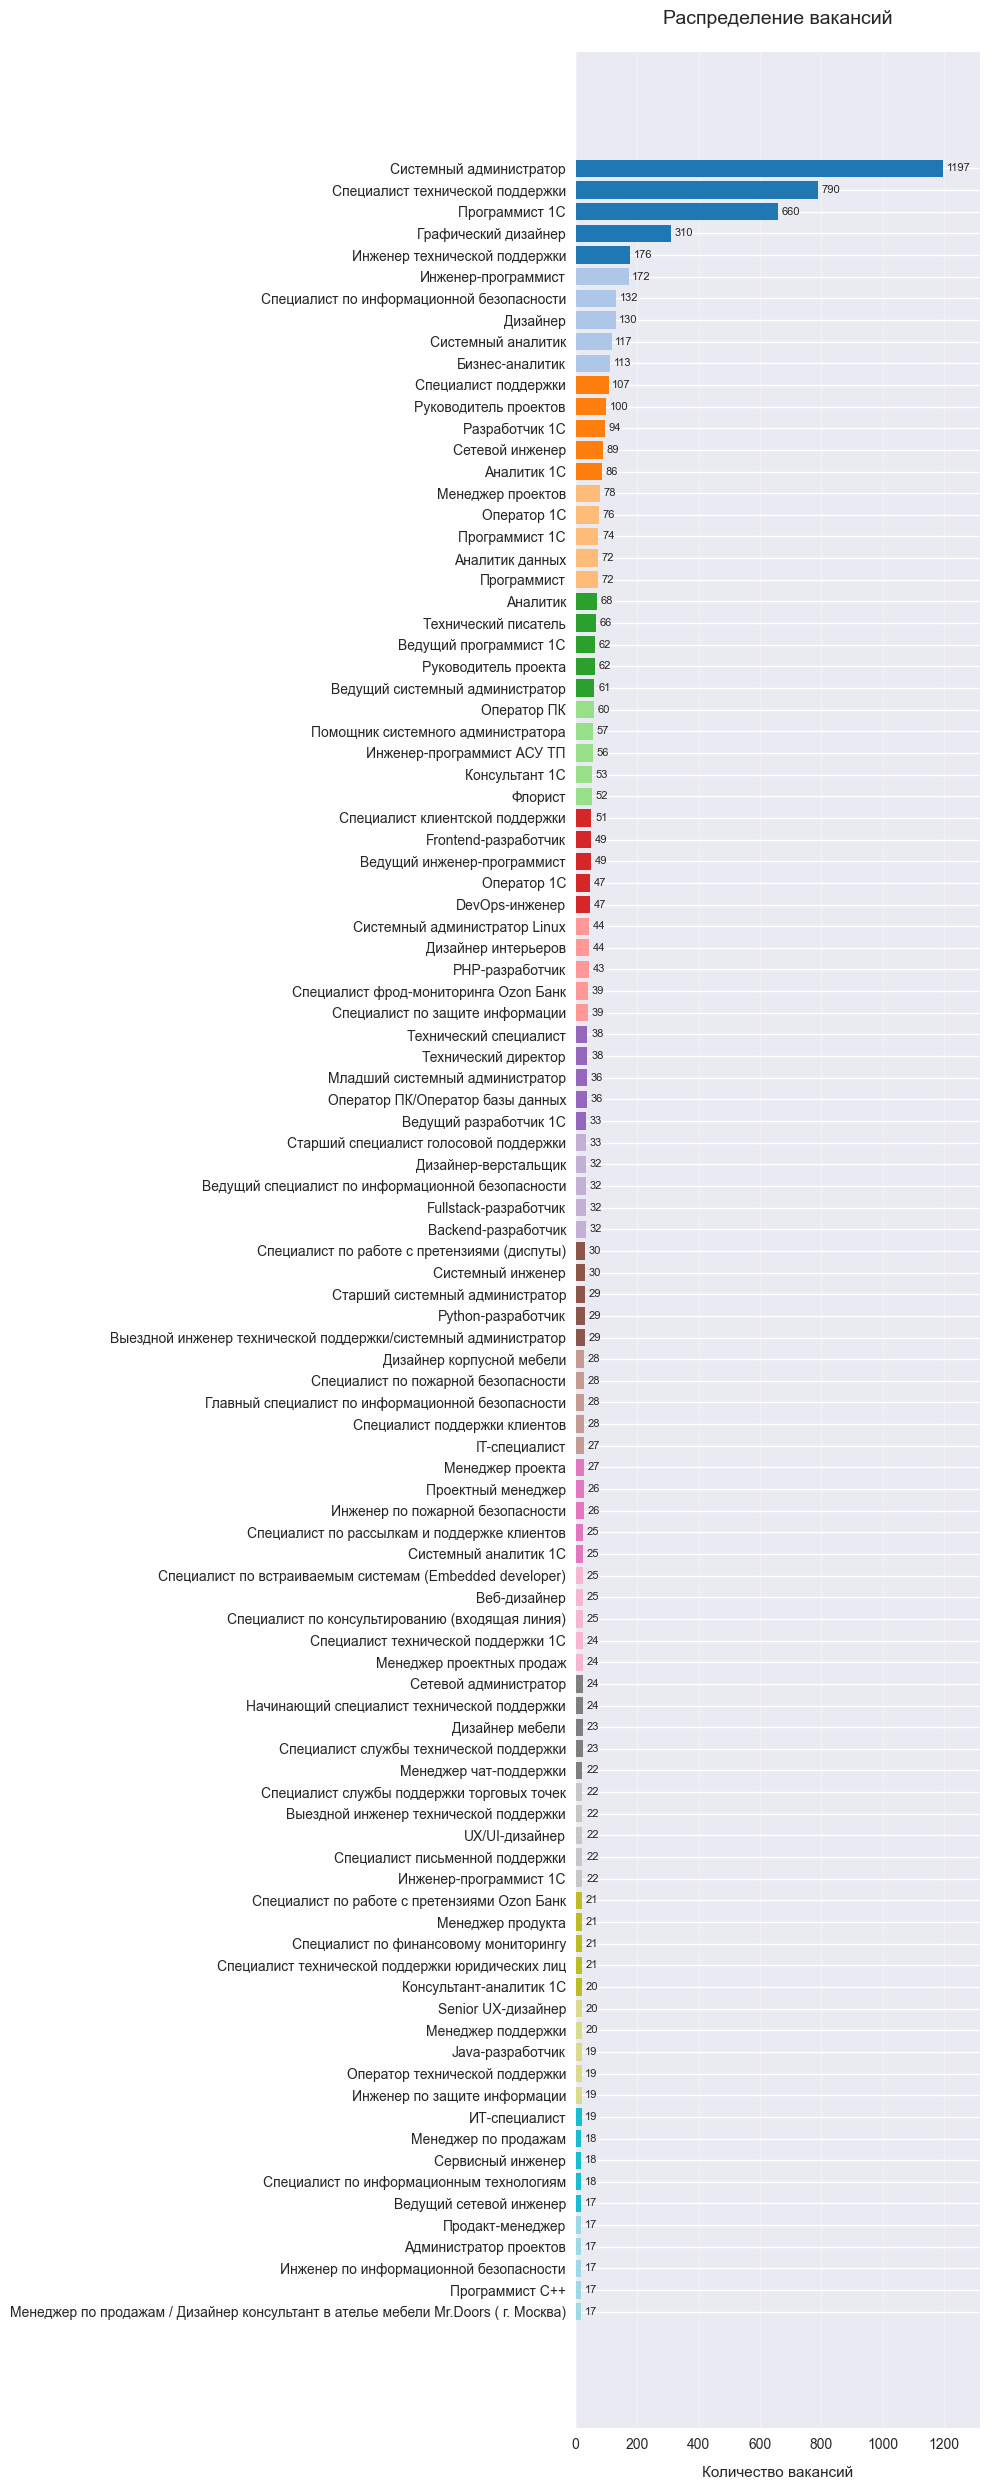

In [ ]:
# посмотрим на распределение вакансий 


vacancy_counts = cleaned_data['vacancy'].value_counts().head(100)


plt.style.use('seaborn')
plt.figure(figsize=(10, 25)) 

# Создаем цветовую карту
colors = plt.cm.tab20(np.linspace(0, 1, len(vacancy_counts)))

# Горизонтальный барплот
bars = plt.barh(
    vacancy_counts.index, 
    vacancy_counts.values,
    color=colors,
    height=0.8
)

# Добавляем значения на столбцы
for bar in bars:
    width = bar.get_width()
    plt.text(
        width + max(vacancy_counts.values)*0.01,  # Небольшой отступ справа
        bar.get_y() + bar.get_height()/2,
        f'{int(width)}',
        va='center',
        fontsize=8
    )

# Настройки графика
plt.title('Распределение вакансий', pad=20, fontsize=14)
plt.xlabel('Количество вакансий', labelpad=10)
plt.ylabel('')
plt.xlim(0, max(vacancy_counts.values)*1.1)  # +10% места для текста


plt.yticks(fontsize=10)

plt.gca().invert_yaxis()

plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

In [63]:
# Функция для очистки и преобразования зарплат
def clean_salary(salary):
    if pd.isna(salary) or salary == '' or salary == 'не указана':
        return np.nan
    
    # Если строка, очищаем от лишних символов
    if isinstance(salary, str):
        # Удаляем пробелы между цифрами (например '140 000' -> '140000')
        salary = salary.replace(' ', '')
        # Удаляем нечисловые символы (кроме точки)
        salary = ''.join(c for c in salary if c.isdigit() or c == '.' ) # or c == '-'
        # Обработка значений типа '90k' (предполагаем, что k означает тысячи)
        if 'k' in salary.lower():
            salary = salary.lower().replace('k', '')
            try:
                return float(salary) * 1000
            except:
                return np.nan
    
    try:
        return float(salary)
    except:
        return np.nan



In [64]:
cleaned_data = cleaned_data.copy()

In [65]:
# Применяем функцию очистки к столбцам с зарплатами
cleaned_data['salary from'] = cleaned_data['salary from'].apply(clean_salary)
cleaned_data['salary to'] = cleaned_data['salary to'].apply(clean_salary)

In [66]:
# подстановка занчений from / to  от соседа

cleaned_data['salary from'] = cleaned_data['salary from'].fillna(cleaned_data['salary to'])
cleaned_data['salary to'] = cleaned_data['salary to'].fillna(cleaned_data['salary from'])

C:\Users\Андрей\AppData\Local\Temp\ipykernel_31300\3325862806.py:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


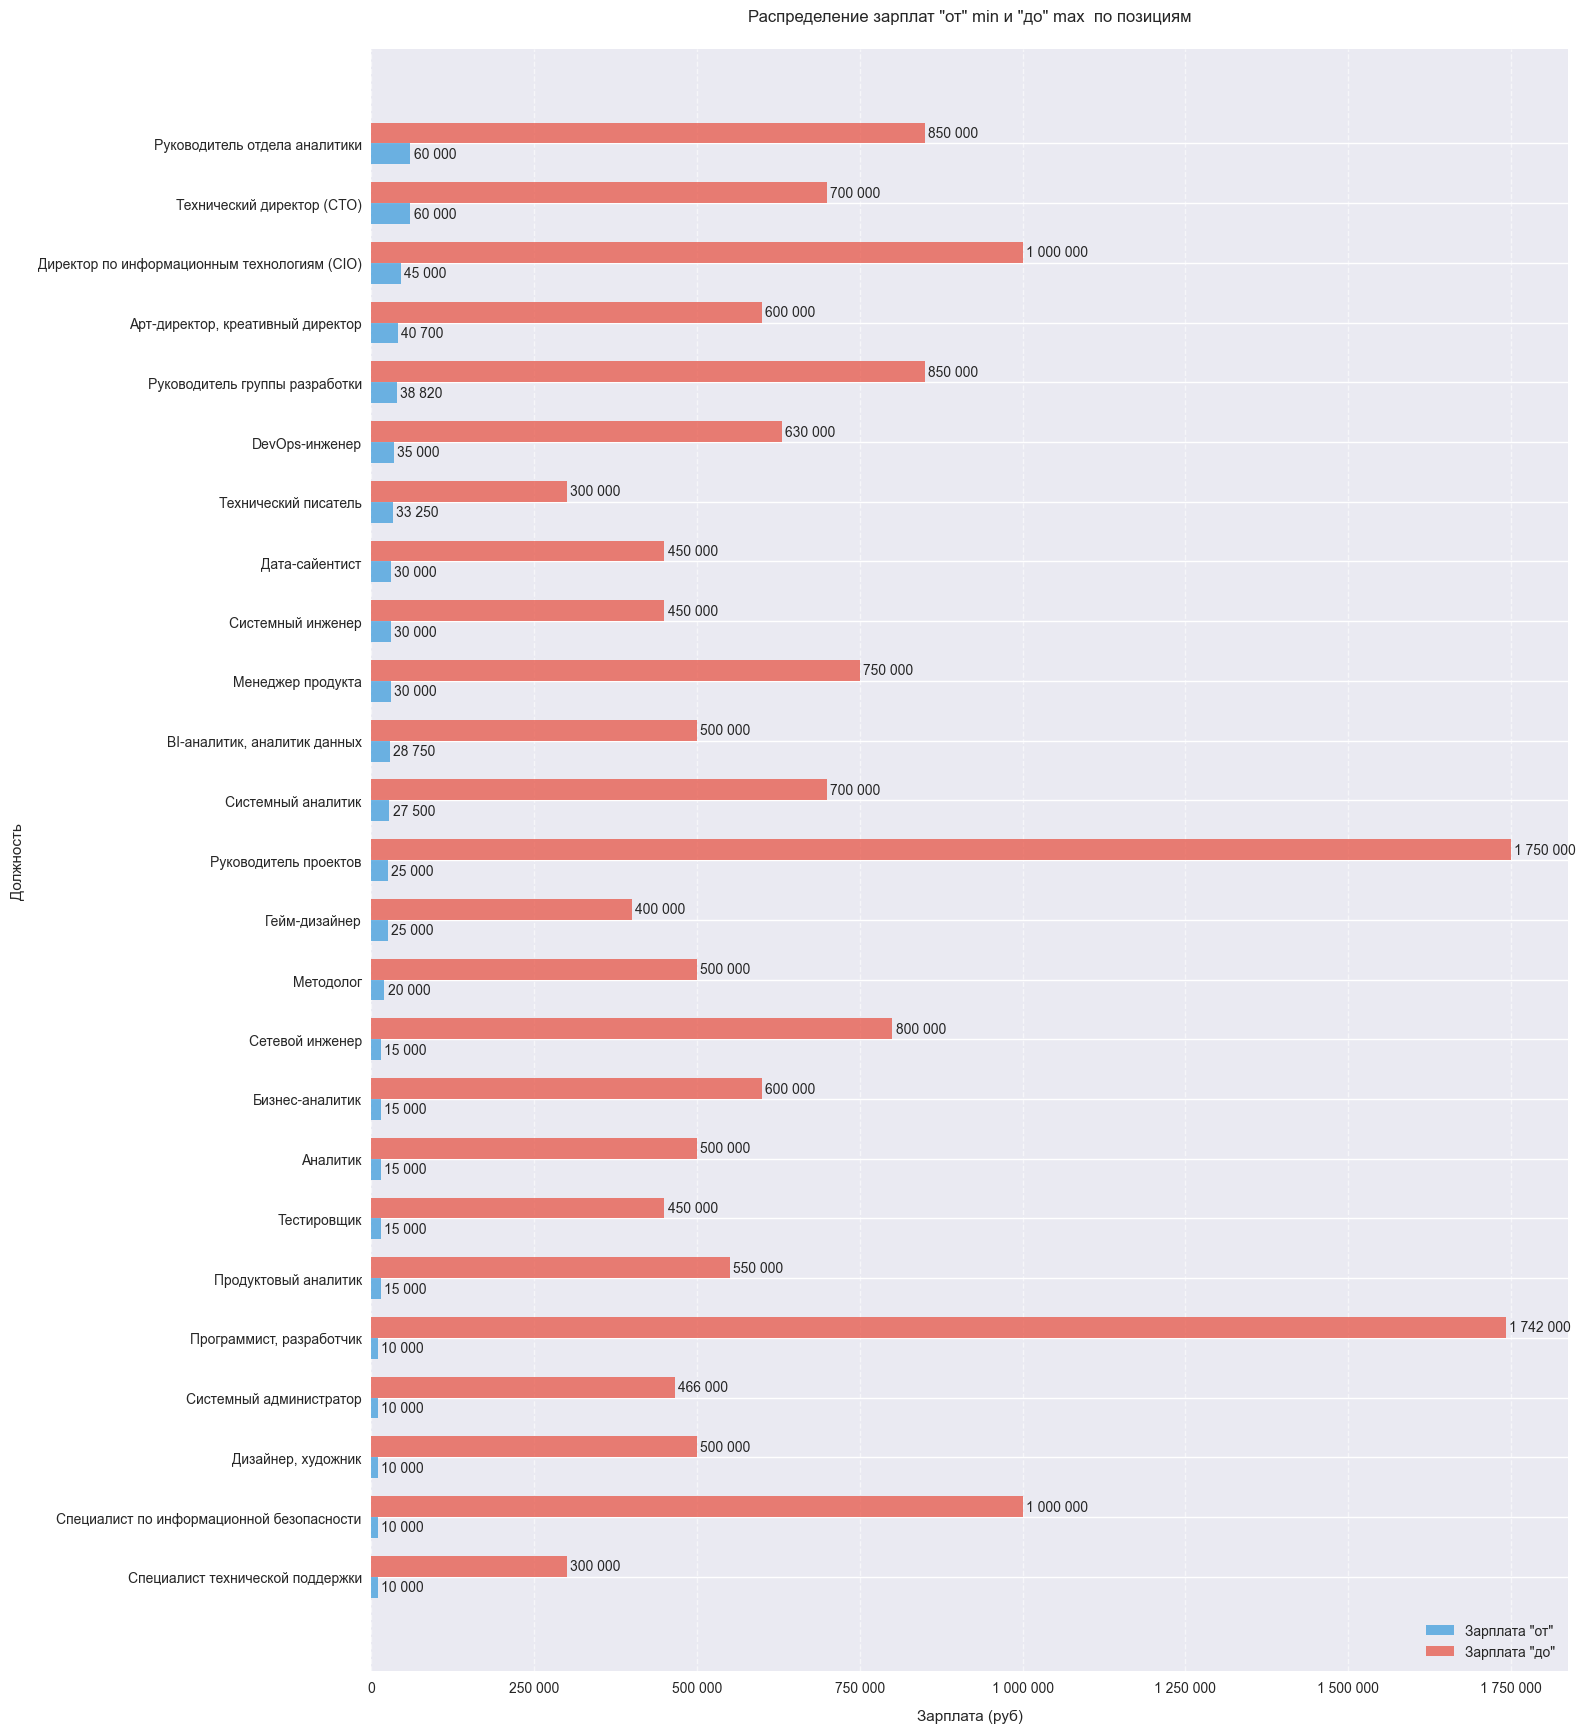

In [ ]:



# Настройки стиля
plt.style.use('seaborn')
plt.rcParams['figure.figsize'] = (16, 12)
plt.rcParams['font.size'] = 12

# Функция для форматирования чисел (100000 -> 100 000)
def thousands_formatter(x, pos):
    return '{:,.0f}'.format(x).replace(',', ' ')

thousands_format = FuncFormatter(thousands_formatter)

# Вычисляем порог для каждой позиции
def calculate_mode(series):
    try:
        return series.mean()  # mode()[0] 
    except:
        return np.nan
    
def calculate_mode_min(series):
    try:
        return series.min()  #quantile(0.05)
    except:
        return np.nan
    
def calculate_mode_max(series):
    try:
        return series.max()   #quantile(0.95)
    except:
        return np.nan    


salary_stats = cleaned_data[(cleaned_data['currency'] == 'RUR') & (cleaned_data['salary from'] >= 10000) ].groupby('position').agg({  # & (cleaned_data['salary from'] >= 10000
    'salary from': calculate_mode_min,
    'salary to': calculate_mode_max
}).reset_index()

# Сортируем по убыванию salary from
salary_stats = salary_stats.sort_values('salary from', ascending=True)

# Создаем фигуру
fig, ax = plt.subplots(figsize=(16, len(salary_stats)*0.7))

# Параметры для столбцов
bar_height = 0.35
y_pos = np.arange(len(salary_stats))

# Рисуем горизонтальные столбцы
bars_from = ax.barh(y_pos - bar_height/2, salary_stats['salary from'], 
                   height=bar_height, color='#3498db', alpha=0.7, label='Зарплата "от"')
bars_to = ax.barh(y_pos + bar_height/2, salary_stats['salary to'], 
                 height=bar_height, color='#e74c3c', alpha=0.7, label='Зарплата "до"')

# Настройки осей
ax.set_yticks(y_pos)
ax.set_yticklabels(salary_stats['position'])
ax.xaxis.set_major_formatter(thousands_format)
ax.grid(axis='x', linestyle='--', alpha=0.6)

# Добавляем значения на столбцы
for i, (val_from, val_to) in enumerate(zip(salary_stats['salary from'], salary_stats['salary to'])):
    ax.text(val_from + 5000, i - bar_height/2, f'{val_from:,.0f}'.replace(',', ' '), 
            va='center', ha='left', fontsize=10)
    ax.text(val_to + 5000, i + bar_height/2, f'{val_to:,.0f}'.replace(',', ' '), 
            va='center', ha='left', fontsize=10)

# Легенда и заголовок
ax.legend(loc='lower right')
#plt.title('quantile зарплат "от"  (0.05) и "до" (0.95)  по позициям', pad=20)
plt.title('Распределение зарплат "от" min и "до" max  по позициям', pad=20)
plt.xlabel('Зарплата (руб)', labelpad=10)
plt.ylabel('Должность', labelpad=10)
plt.tight_layout()

plt.show()

In [68]:
# Фильтруем данные по рублям
rur_data = cleaned_data[(cleaned_data['currency'] == 'RUR') & (cleaned_data['salary to'] >= 10000) ].copy()


c:\Users\Андрей\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\categorical.py:3399: UserWarning: 67.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\Андрей\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\categorical.py:3399: UserWarning: 64.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\Андрей\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\categorical.py:3399: UserWarning: 26.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\Андрей\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\categorical.py:3399: UserWarning: 27.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(ms

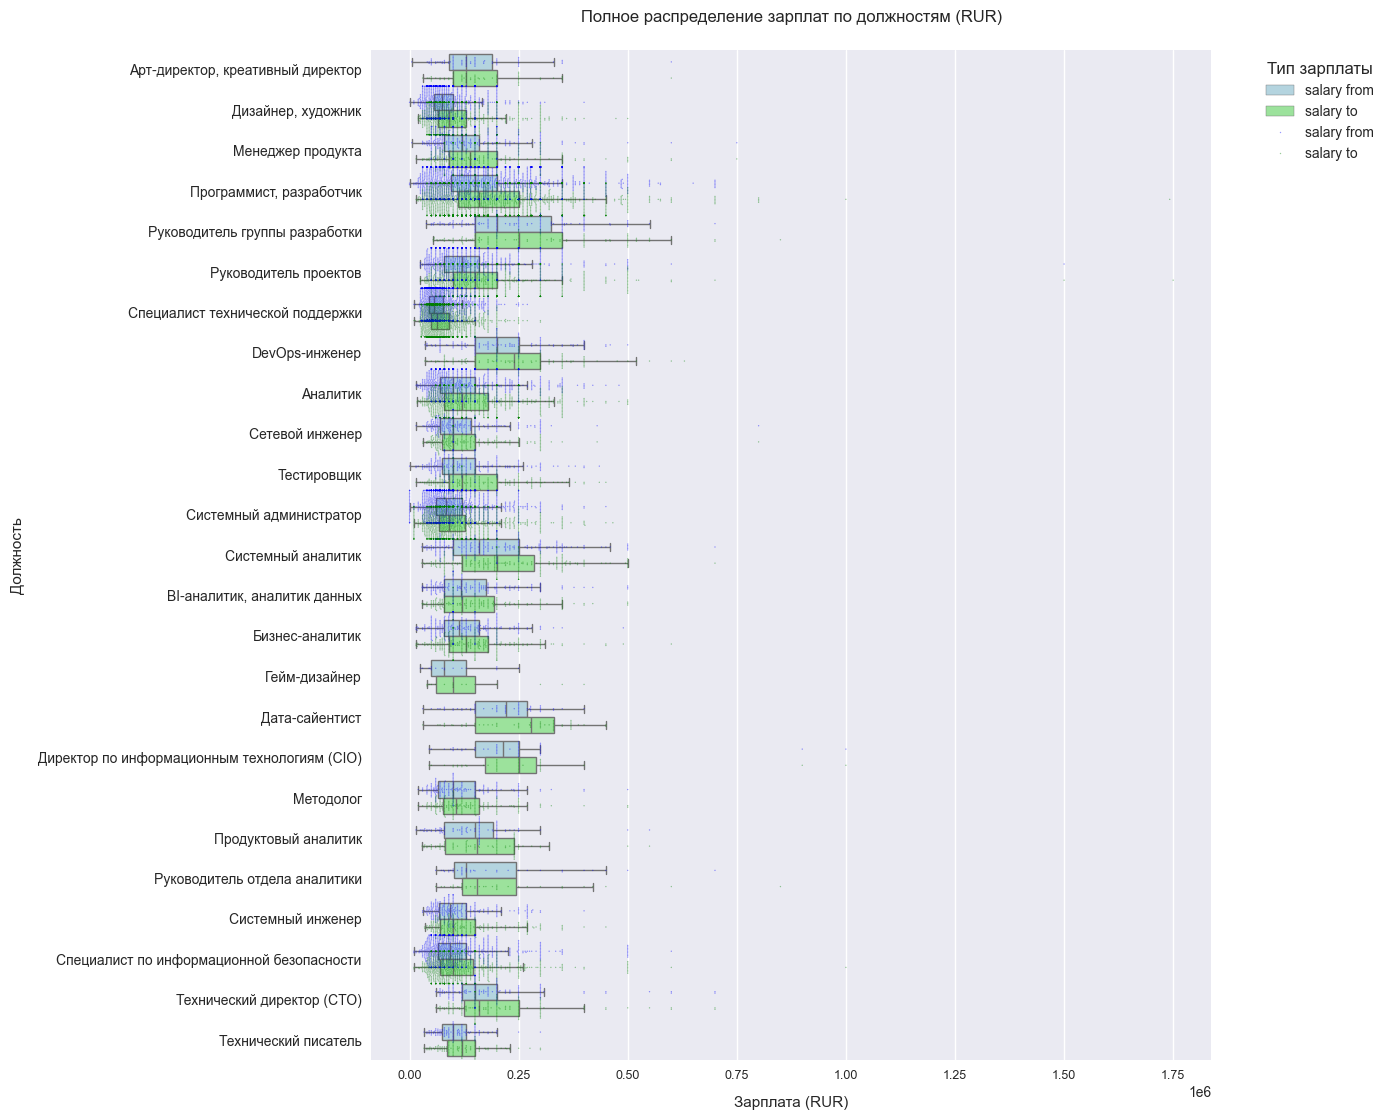

In [69]:
rur_data = cleaned_data[(cleaned_data['currency'] == 'RUR') & (cleaned_data['salary to'] >= 10000) ].copy()

# для визуализации
melted_data = pd.melt(
    rur_data,
    id_vars=['position'],
    value_vars=['salary from', 'salary to'],
    var_name='salary_type',
    value_name='amount'
)

plt.figure(figsize=(14, 12))  

# Создаем горизонтальный boxplot 
box = sns.boxplot(
    data=melted_data,
    y='position',
    x='amount',
    hue='salary_type',
    orient='h',
    palette={'salary from': 'lightblue', 'salary to': 'lightgreen'},
    showfliers=False,
    dodge=True,
    width=0.8  # Увеличиваем ширину боксов
)

# Добавляем swarmplot с уменьшенным размером точек
sns.swarmplot(
    data=melted_data,
    y='position',
    x='amount',
    hue='salary_type',
    orient='h',
    palette={'salary from': 'blue', 'salary to': 'green'},
    size=1,  # Чуть уменьшаем размер точек
    alpha=0.4,
    dodge=True
)

# Правильный способ изменить размер шрифта подписей
plt.yticks(fontsize=10)  # Устанавливаем размер шрифта для меток оси Y
plt.xticks(fontsize=9)   # Устанавливаем размер шрифта для меток оси X

# Настройки отображения с дополнительным пространством
plt.title('Полное распределение зарплат по должностям (RUR)', pad=20, fontsize=12)
plt.xlabel('Зарплата (RUR)', labelpad=10, fontsize=11)
plt.ylabel('Должность', labelpad=10, fontsize=11)
plt.legend(title='Тип зарплаты', bbox_to_anchor=(1.05, 1), loc='upper left')

# Увеличиваем отступы вокруг графика
plt.tight_layout(pad=3.0)
plt.subplots_adjust(left=0.25, right=0.85)  # Регулируем пространство по бокам

plt.show()

In [ ]:
# посмотрим на "выбросы"
mask1 = ((cleaned_data['salary from'] < 10000) | (cleaned_data['salary to'] > 1400000) ) 
with pd.option_context('display.max_rows', 100):
    display(cleaned_data[(mask1) & (cleaned_data['currency'] == 'RUR')])

,position,date,vacancy,company,city,experience,employment,schedule,salary from,salary to,...,industry,text,period of pay,level,responsibilities,requirements,education,benefits,contacts,contact
152,"Дизайнер, художник",2025-06-03T09:22:41+0300,Графический дизайнер,MAGNUM ESTATE,Индонезия,От 3 до 6 лет,Полная занятость,Полный день,1500.0,2000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3695,"Программист, разработчик",2025-05-22T11:50:20+0300,Ведущий разработчик-программист 1С,Icgroup.az,Баку,NaN,Полная занятость,Полный день,500.0,2500.0,...,NaN,Обязанности:\n \n \n \nНепосредственное участи...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4360,Менеджер продукта,2025-05-13T12:30:33+0300,Менеджер маркетплейсов (WB),Доронин Сергей Александрович,Минск,NaN,Частичная занятость,Удаленная работа,5000.0,15000.0,...,NaN,Ищу менеджера WB\n \nТребуется ответственный с...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9486,DevOps-инженер,2025-05-27T16:20:02+0300,DevOps Engineer,ЭИР Продакшн,Москва,1–3 года,Частичная занятость,Удаленная работа,1000.0,1000.0,...,"Системная интеграция, автоматизации технологи...","AIR — небольшое агентство, которое делает прое...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9717,DevOps-инженер,2025-05-14T16:15:45+0300,Архитектор/Проектная работа/DevOps Senior,Southbridge,Москва,3–6 лет,Проектная работа,Удаленная работа,5000.0,5000.0,...,"Системная интеграция, автоматизации технологи...","Привет!\n \nМы, Southbridge, работаем с 2007 г...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10884,Аналитик,2025-05-26T17:38:19+0300,Консультант 1С - Бухгалтерия и ЗУП,Организация Бесперебойной Работы Предприятия,Краснознаменск (Московская область),1–3 года,Полная занятость,Удаленная работа,80.0,120.0,...,"Системная интеграция, автоматизации технологи...","Привет! \nЯ Денис,\n ITшник с >20 летним опыто...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13447,Аналитик,2025-05-15T14:27:26+0300,Консультант-аналитик 1С ЗУП,ГК Addwise/Addpro,Москва,1–3 года,Полная занятость,Удаленная работа,220.0,280.0,...,Кадровые агентства,Обязанности:\n \nВ крупную топливно-энергетиче...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13810,"Арт-директор, креативный директор",2025-06-04T18:29:31+0300,Креативный менеджер в сфере корпоративных пода...,Комминт,Санкт-Петербург,1–3 года,Проектная работа,Удаленная работа,5000.0,30000.0,...,"Маркетинговые, рекламные, BTL, дизайнерские, E...","Com.Mint — мерч-агентство, специализирующееся ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16457,"Дизайнер, художник",2025-06-05T23:20:54+0300,Контент-менеджер по сбору примеров сайтов и ин...,Referest,Москва,Нет опыта,Частичная занятость,Удаленная работа,240.0,288.0,...,"Интернет-компания (поисковики, платежные систе...",Ищем контент-менеджера для Referest.ru\n \nБез...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16789,"Дизайнер, художник",2025-05-14T14:08:23+0300,3D Rigger & Animator,СИНКОПП,Нижний Новгород,1–3 года,Проектная работа,Удаленная работа,300.0,800.0,...,"Производство мультимедиа, контента, редакторск...","Привет! Мы — небольшая, но амбициозная команда...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [71]:
outliers = cleaned_data[(mask1) & (cleaned_data['currency'] == 'RUR')]

outliers.to_csv('outliers.csv')

In [72]:
cleaned_data['position'].value_counts().shape[0]

25

In [73]:
#rur_data = cleaned_data[(cleaned_data['currency'] == 'RUR') & mask].copy()

c:\Users\Андрей\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\categorical.py:3399: UserWarning: 67.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\Андрей\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\categorical.py:3399: UserWarning: 65.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\Андрей\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\categorical.py:3399: UserWarning: 30.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\Андрей\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\categorical.py:3399: UserWarning: 30.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(ms

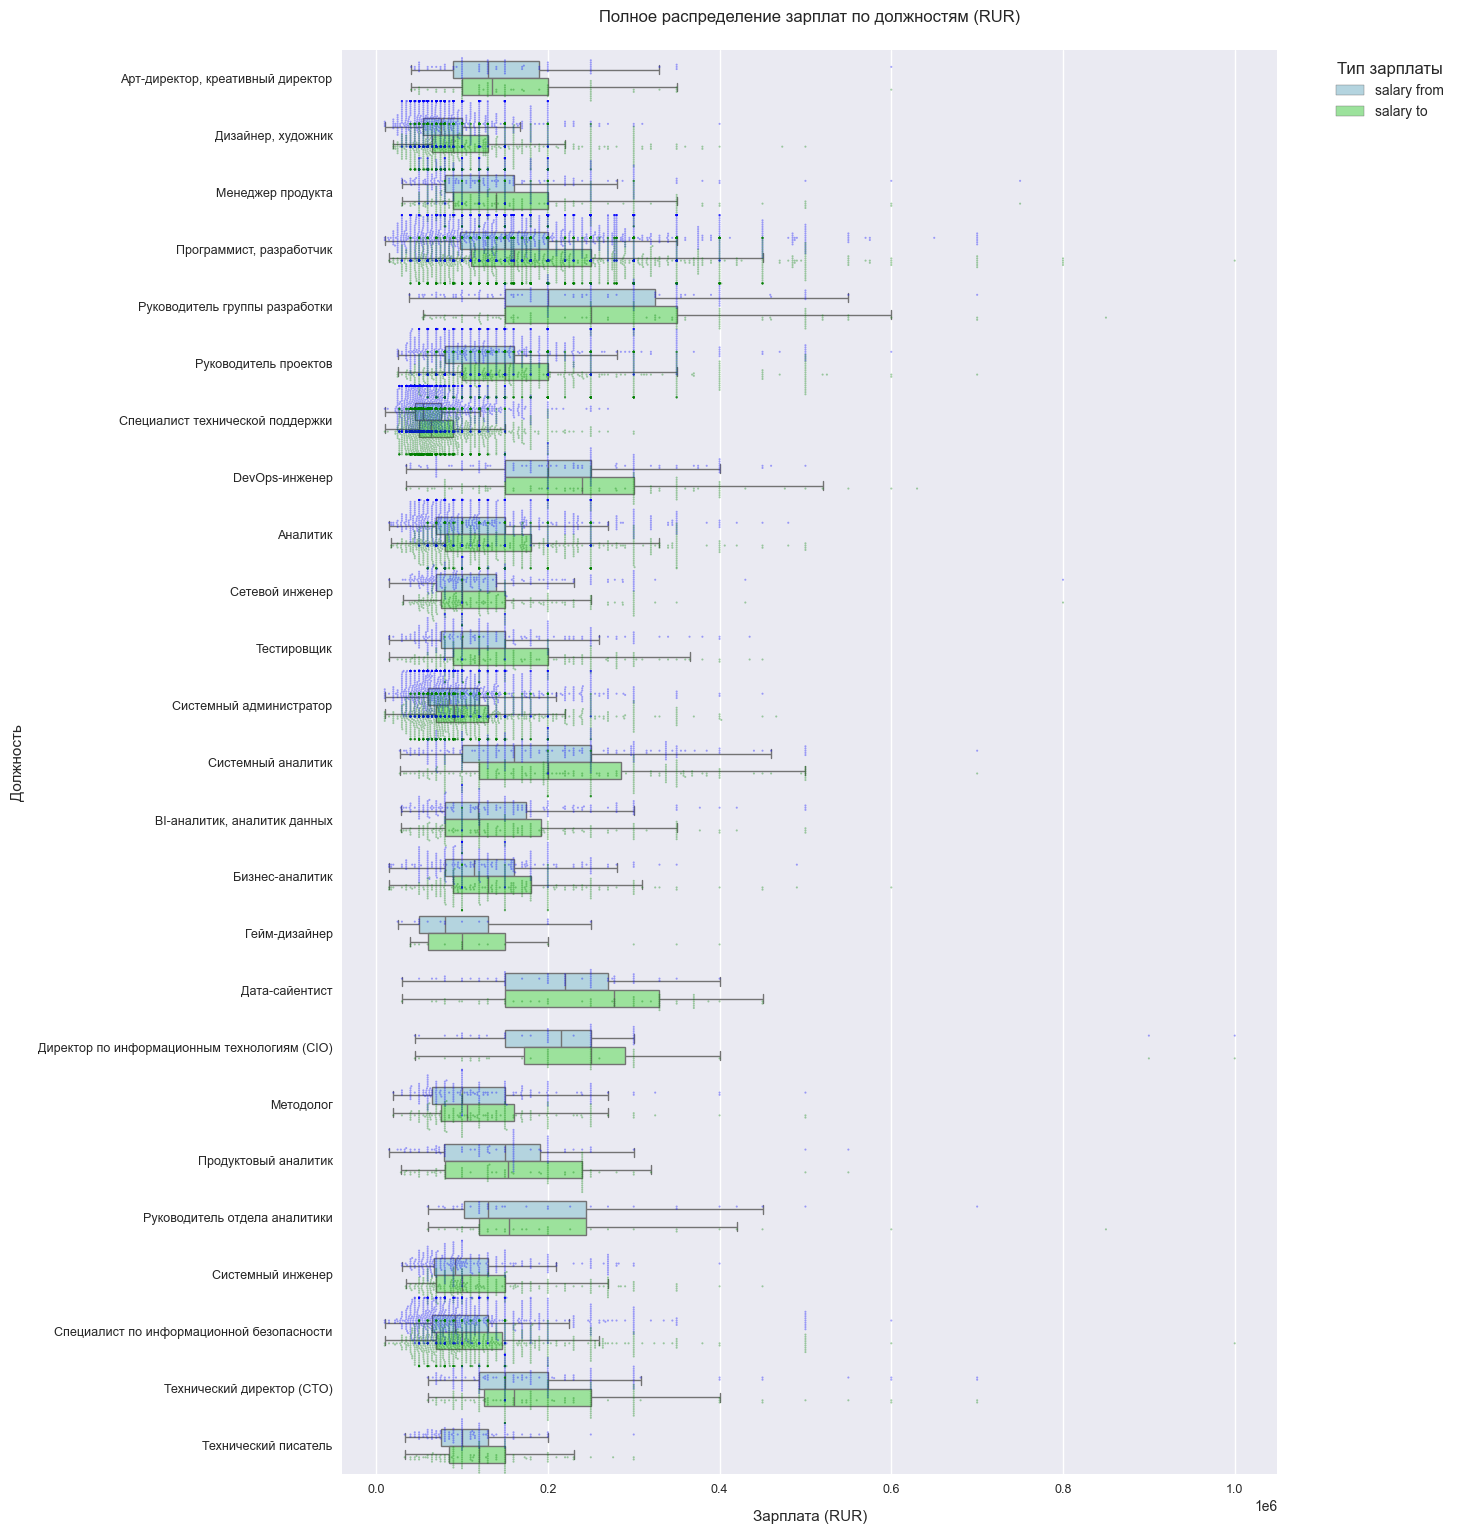

In [74]:
# Фильтрация данных
rur_data = cleaned_data[
    (cleaned_data['currency'] == 'RUR') &
    (cleaned_data['salary from'] >= 10000) & (cleaned_data['salary to'] < 1500000)
].copy()

# Преобразование для визуализации
melted_data = pd.melt(
    rur_data,
    id_vars=['position'],
    value_vars=['salary from', 'salary to'],
    var_name='salary_type',
    value_name='amount'
)

plt.figure(figsize=(17, 0.5 * melted_data['position'].nunique() + 3))  # Увеличиваем высоту графика в зависимости от количества позиций

# Создаем boxplot
sns.boxplot(
    data=melted_data,
    y='position',
    x='amount',
    hue='salary_type',
    orient='h',
    palette={'salary from': 'lightblue', 'salary to': 'lightgreen'},
    showfliers=False,
    dodge=True,
    width=0.6
)

# Добавляем swarmplot
sns.swarmplot(
    data=melted_data,
    y='position',
    x='amount',
    hue='salary_type',
    orient='h',
    palette={'salary from': 'blue', 'salary to': 'green'},
    size=1.5,
    alpha=0.35,
    dodge=True,
    linewidth=0
)

# Удаляем двойную легенду
handles, labels = plt.gca().get_legend_handles_labels()
n = len(set(melted_data['salary_type']))
plt.legend(handles[:n], labels[:n], title='Тип зарплаты', bbox_to_anchor=(1.05, 1), loc='upper left')

# Настройки осей и отступов
plt.yticks(fontsize=9)
plt.xticks(fontsize=9)
plt.title('Полное распределение зарплат по должностям (RUR)', pad=20, fontsize=12)
plt.xlabel('Зарплата (RUR)', labelpad=10, fontsize=11)
plt.ylabel('Должность', labelpad=10, fontsize=11)

# Автоотступы
plt.tight_layout()
plt.subplots_adjust(left=0.3, right=0.85)  # больше места под длинные названия должностей

plt.show()

In [ ]:
# переведем з/п  в рубли

data_convert = cleaned_data.copy()

In [76]:
data_convert['currency'].value_counts()

currency
RUR    17527
₽       3924
KZT     1174
USD      652
BYR      484
UZS      265
EUR      207
KGS      108
$         38
AZN       10
€          4
GEL        1
Name: count, dtype: int64

In [77]:
data_convert[data_convert['currency'] =='BYR']

,position,date,vacancy,company,city,experience,employment,schedule,salary from,salary to,...,industry,text,period of pay,level,responsibilities,requirements,education,benefits,contacts,contact
3732,"BI-аналитик, аналитик данных",2025-06-06T10:13:15+0300,PowerBI аналитик,Диван Бай,Минск,NaN,Полная занятость,Полный день,6000.0,6000.0,...,NaN,"Мы запускали собственные онлайн-магазины, откр...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3743,"BI-аналитик, аналитик данных",2025-05-20T08:46:46+0300,Аналитик данных / экономист-аналитик,Центр передовой коммерции,Минск,NaN,Полная занятость,Полный день,1800.0,2400.0,...,NaN,"Привет!\n Мы- компания, которая занимается соз...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3750,"BI-аналитик, аналитик данных",2025-05-12T13:07:56+0300,Аналитик данных,Марк Формэль,Минск,NaN,Полная занятость,Полный день,2500.0,2500.0,...,NaN,Mark Formelle - \nлидирующий производитель оде...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3777,DevOps-инженер,2025-05-31T10:29:26+0300,Начальник сектора по обеспечению кибербезопасн...,Гродно Азот,Гродно,NaN,Полная занятость,Полный день,5000.0,5000.0,...,NaN,Обязанности:\n \n \nУправление сектором по обе...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3799,Аналитик,2025-06-07T15:05:08+0300,Специалист по аналитике продаж,Интер-фрейт,Минск,NaN,Полная занятость,Полный день,1600.0,1600.0,...,NaN,О компании:\n“Интер-фрейт”\n – международная л...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5719,Тестировщик,2025-05-12T14:21:30+0300,Специалист по автоматизированному тестированию,Корал Тим,Минск,NaN,Полная занятость,Полный день,4000.0,5000.0,...,NaN,Сoral Team\n is a software development company...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5723,Технический директор (CTO),2025-06-08T08:51:33+0300,Заместитель директора по кибербезопасности,ИВЦ Минфина,Минск,NaN,Полная занятость,Полный день,5000.0,5000.0,...,NaN,Обязанности:\n \n \n \nОрганизация и контроль ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5729,Технический директор (CTO),2025-05-22T09:30:54+0300,Главный инженер,Завод энергетического машиностроения,Полоцк,NaN,Полная занятость,Полный день,1500.0,2500.0,...,NaN,Требования:\n \n​​​​Необходимы знания в област...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5732,Технический директор (CTO),2025-05-14T09:05:02+0300,Заместитель директора/главный инженер,УльтраКем,Дзержинск (Беларусь),NaN,Полная занятость,Полный день,2000.0,3000.0,...,NaN,Обязанности:\n \n \nорганизация безаварийной э...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [78]:
def standart_currency(cur):
    
    currency_map  = {'₽':'RUR',
            '$': 'USD',
            '€': 'EUR'}
    
    return currency_map.get(cur, cur)



In [ ]:

data_convert['currency'] = data_convert['currency'].apply(standart_currency) 

In [80]:
data_convert['currency'].value_counts()

currency
RUR    21451
KZT     1174
USD      690
BYR      484
UZS      265
EUR      211
KGS      108
AZN       10
GEL        1
Name: count, dtype: int64

In [ ]:
# Маска по выбросам

mask = (data_convert['salary from'] >= 10000) & (data_convert['salary to'] < 1500000)

In [ ]:
data_convert = data_convert[mask] # убипаем выбросы

In [83]:
data_convert.shape[0]

22614

In [84]:
data_convert = data_convert[~data_convert['position'].isna()]

In [85]:
data_convert.shape[0]

18692

C:\Users\Андрей\AppData\Local\Temp\ipykernel_31300\1709375604.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


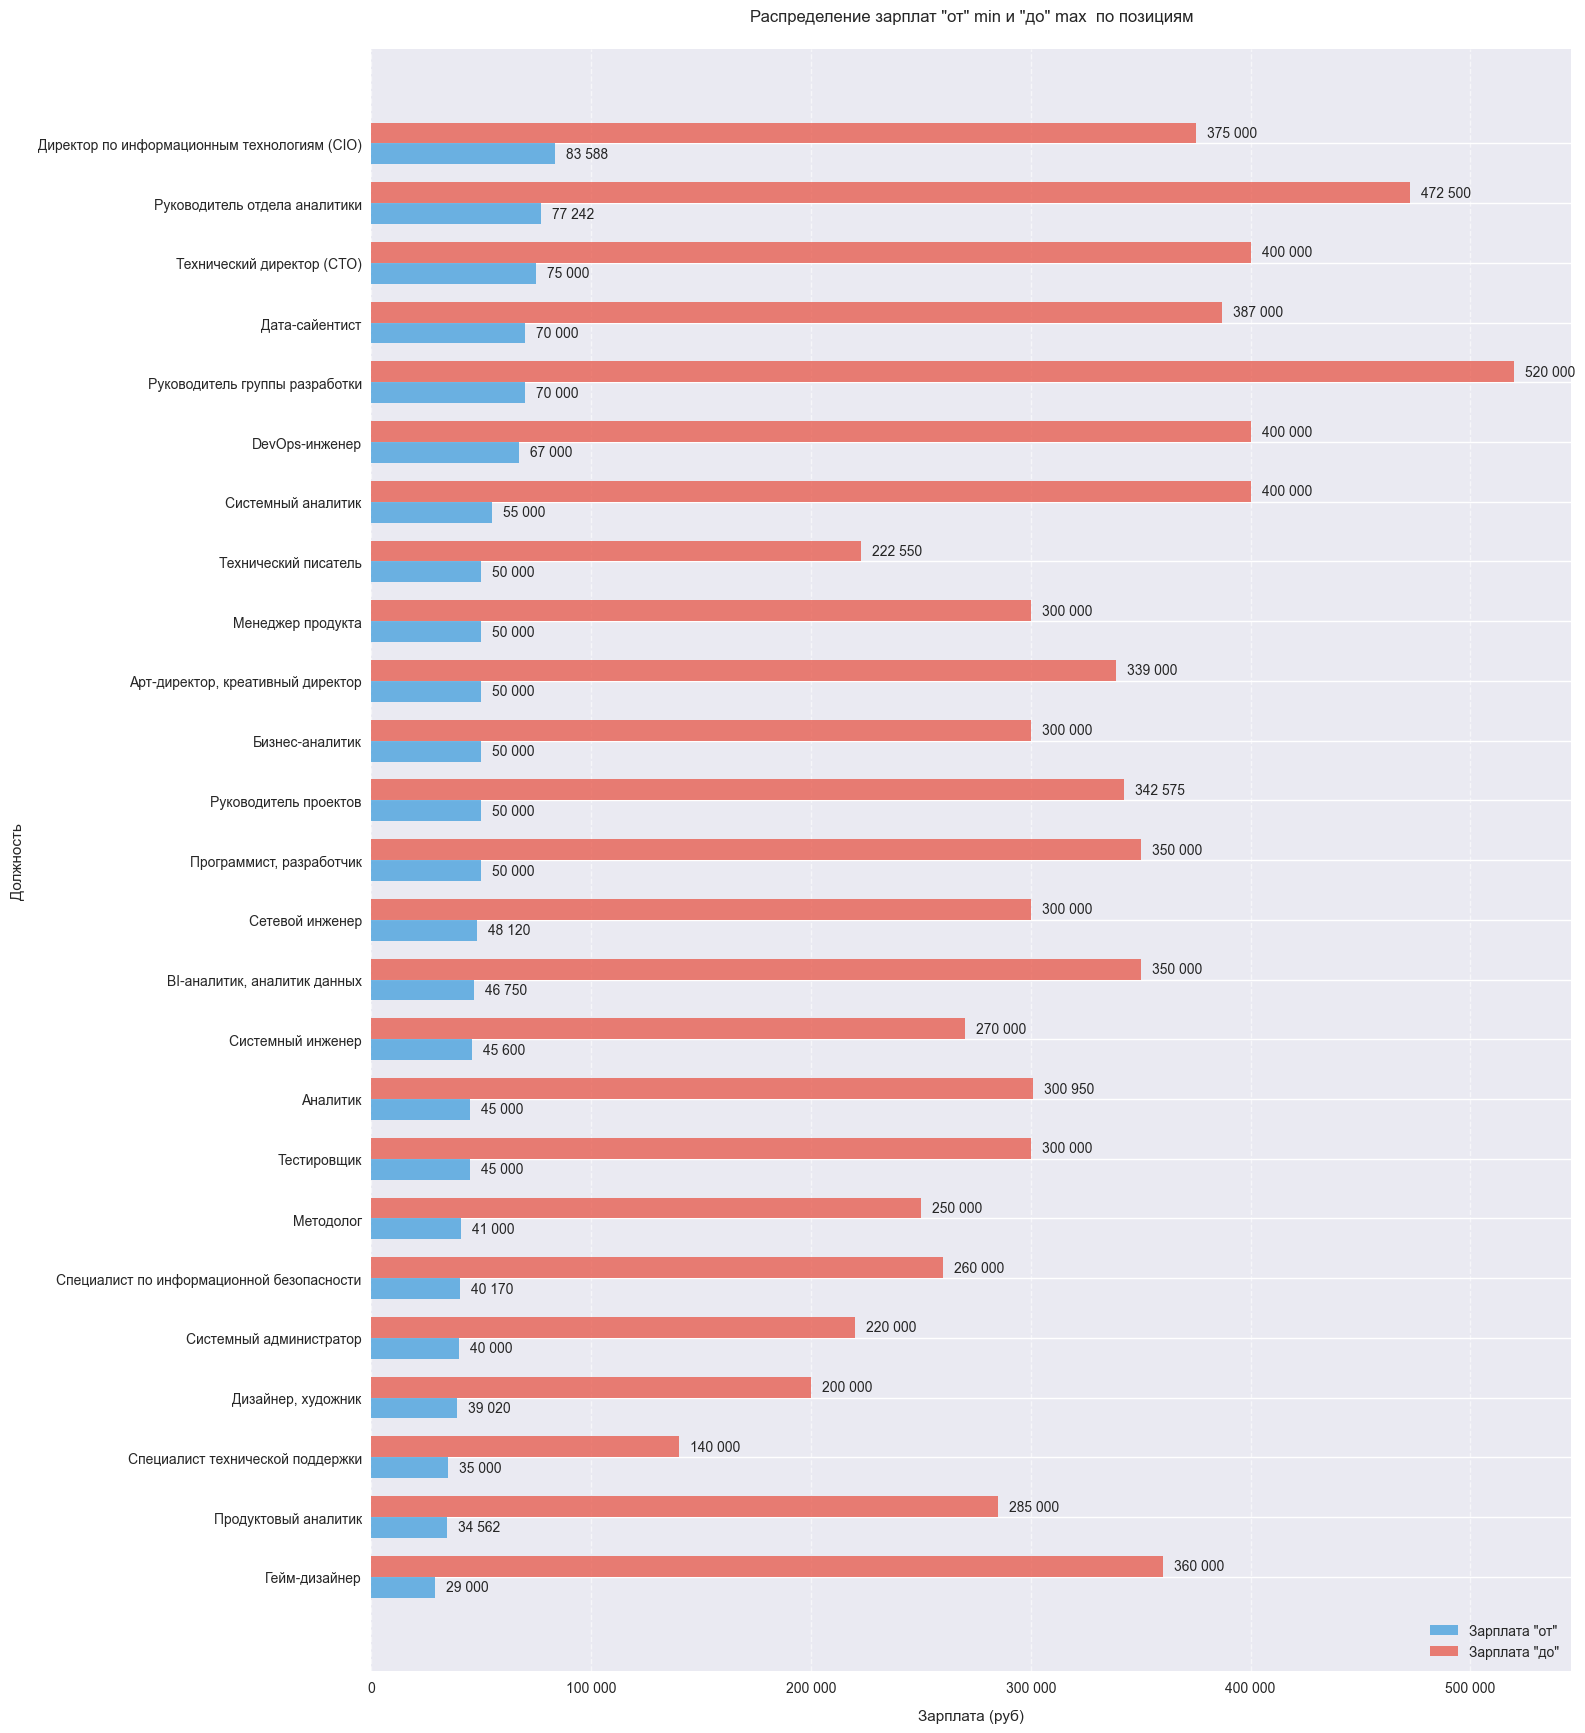

In [ ]:
# График распеделения до конвертации рублей 


# Настройки стиля
plt.style.use('seaborn')
plt.rcParams['figure.figsize'] = (16, 12)
plt.rcParams['font.size'] = 12

# Функция для форматирования чисел (100000 -> 100 000)
def thousands_formatter(x, pos):
    return '{:,.0f}'.format(x).replace(',', ' ')

thousands_format = FuncFormatter(thousands_formatter)

# Вычисляем порог для каждой позиции
def calculate_mode(series):
    try:
        return series.mean()  # mode()[0] 
    except:
        return np.nan
    
def calculate_mode_min(series):
    try:
        return series.quantile(0.05)  #quantile(0.05)
    except:
        return np.nan
    
def calculate_mode_max(series):
    try:
        return series.quantile(0.95)  #quantile(0.95)
    except:
        return np.nan    


salary_stats = data_convert[(data_convert['currency'] == 'RUR')].groupby('position').agg({
    'salary from': calculate_mode_min,
    'salary to': calculate_mode_max
}).reset_index()

# Сортируем по убыванию salary from
salary_stats = salary_stats.sort_values('salary from', ascending=True)

# Создаем фигуру
fig, ax = plt.subplots(figsize=(16, len(salary_stats)*0.7))

# Параметры для столбцов
bar_height = 0.35
y_pos = np.arange(len(salary_stats))

# Рисуем горизонтальные столбцы
bars_from = ax.barh(y_pos - bar_height/2, salary_stats['salary from'], 
                   height=bar_height, color='#3498db', alpha=0.7, label='Зарплата "от"')
bars_to = ax.barh(y_pos + bar_height/2, salary_stats['salary to'], 
                 height=bar_height, color='#e74c3c', alpha=0.7, label='Зарплата "до"')

# Настройки осей
ax.set_yticks(y_pos)
ax.set_yticklabels(salary_stats['position'])
ax.xaxis.set_major_formatter(thousands_format)
ax.grid(axis='x', linestyle='--', alpha=0.6)

# Добавляем значения на столбцы
for i, (val_from, val_to) in enumerate(zip(salary_stats['salary from'], salary_stats['salary to'])):
    ax.text(val_from + 5000, i - bar_height/2, f'{val_from:,.0f}'.replace(',', ' '), 
            va='center', ha='left', fontsize=10)
    ax.text(val_to + 5000, i + bar_height/2, f'{val_to:,.0f}'.replace(',', ' '), 
            va='center', ha='left', fontsize=10)

# Легенда и заголовок
ax.legend(loc='lower right')
#plt.title('quantile зарплат "от"  (0.05) и "до" (0.95)  по позициям', pad=20)
plt.title('Распределение зарплат "от" min и "до" max  по позициям', pad=20)
plt.xlabel('Зарплата (руб)', labelpad=10)
plt.ylabel('Должность', labelpad=10)
plt.tight_layout()

plt.show()

In [ ]:
# Сохраняем данные для Евгении
salary_stats.to_excel('salary_stats.xlsx', index=False)

In [88]:
data_convert_copy = data_convert.copy()

In [ ]:
from converter_to_RUB_2 import convert_to_rub

# применяем функцию Николая . Внимание ! Будет работать если из  файла converter_to_RUB_2 убрать блок сохранения данных в файл 
data_convert_copy = data_convert_copy.apply(convert_to_rub, axis=1)


c:\Users\Андрей\AppData\Local\Programs\Python\Python39\lib\site-packages\requests\__init__.py:109: RequestsDependencyWarning: urllib3 (2.4.0) or chardet (5.1.0)/charset_normalizer (3.4.2) doesn't match a supported version!
  warnings.warn(


In [90]:
data_convert_copy['currency'].value_counts()

currency
RUB    18692
Name: count, dtype: int64

C:\Users\Андрей\AppData\Local\Temp\ipykernel_31300\2069389107.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


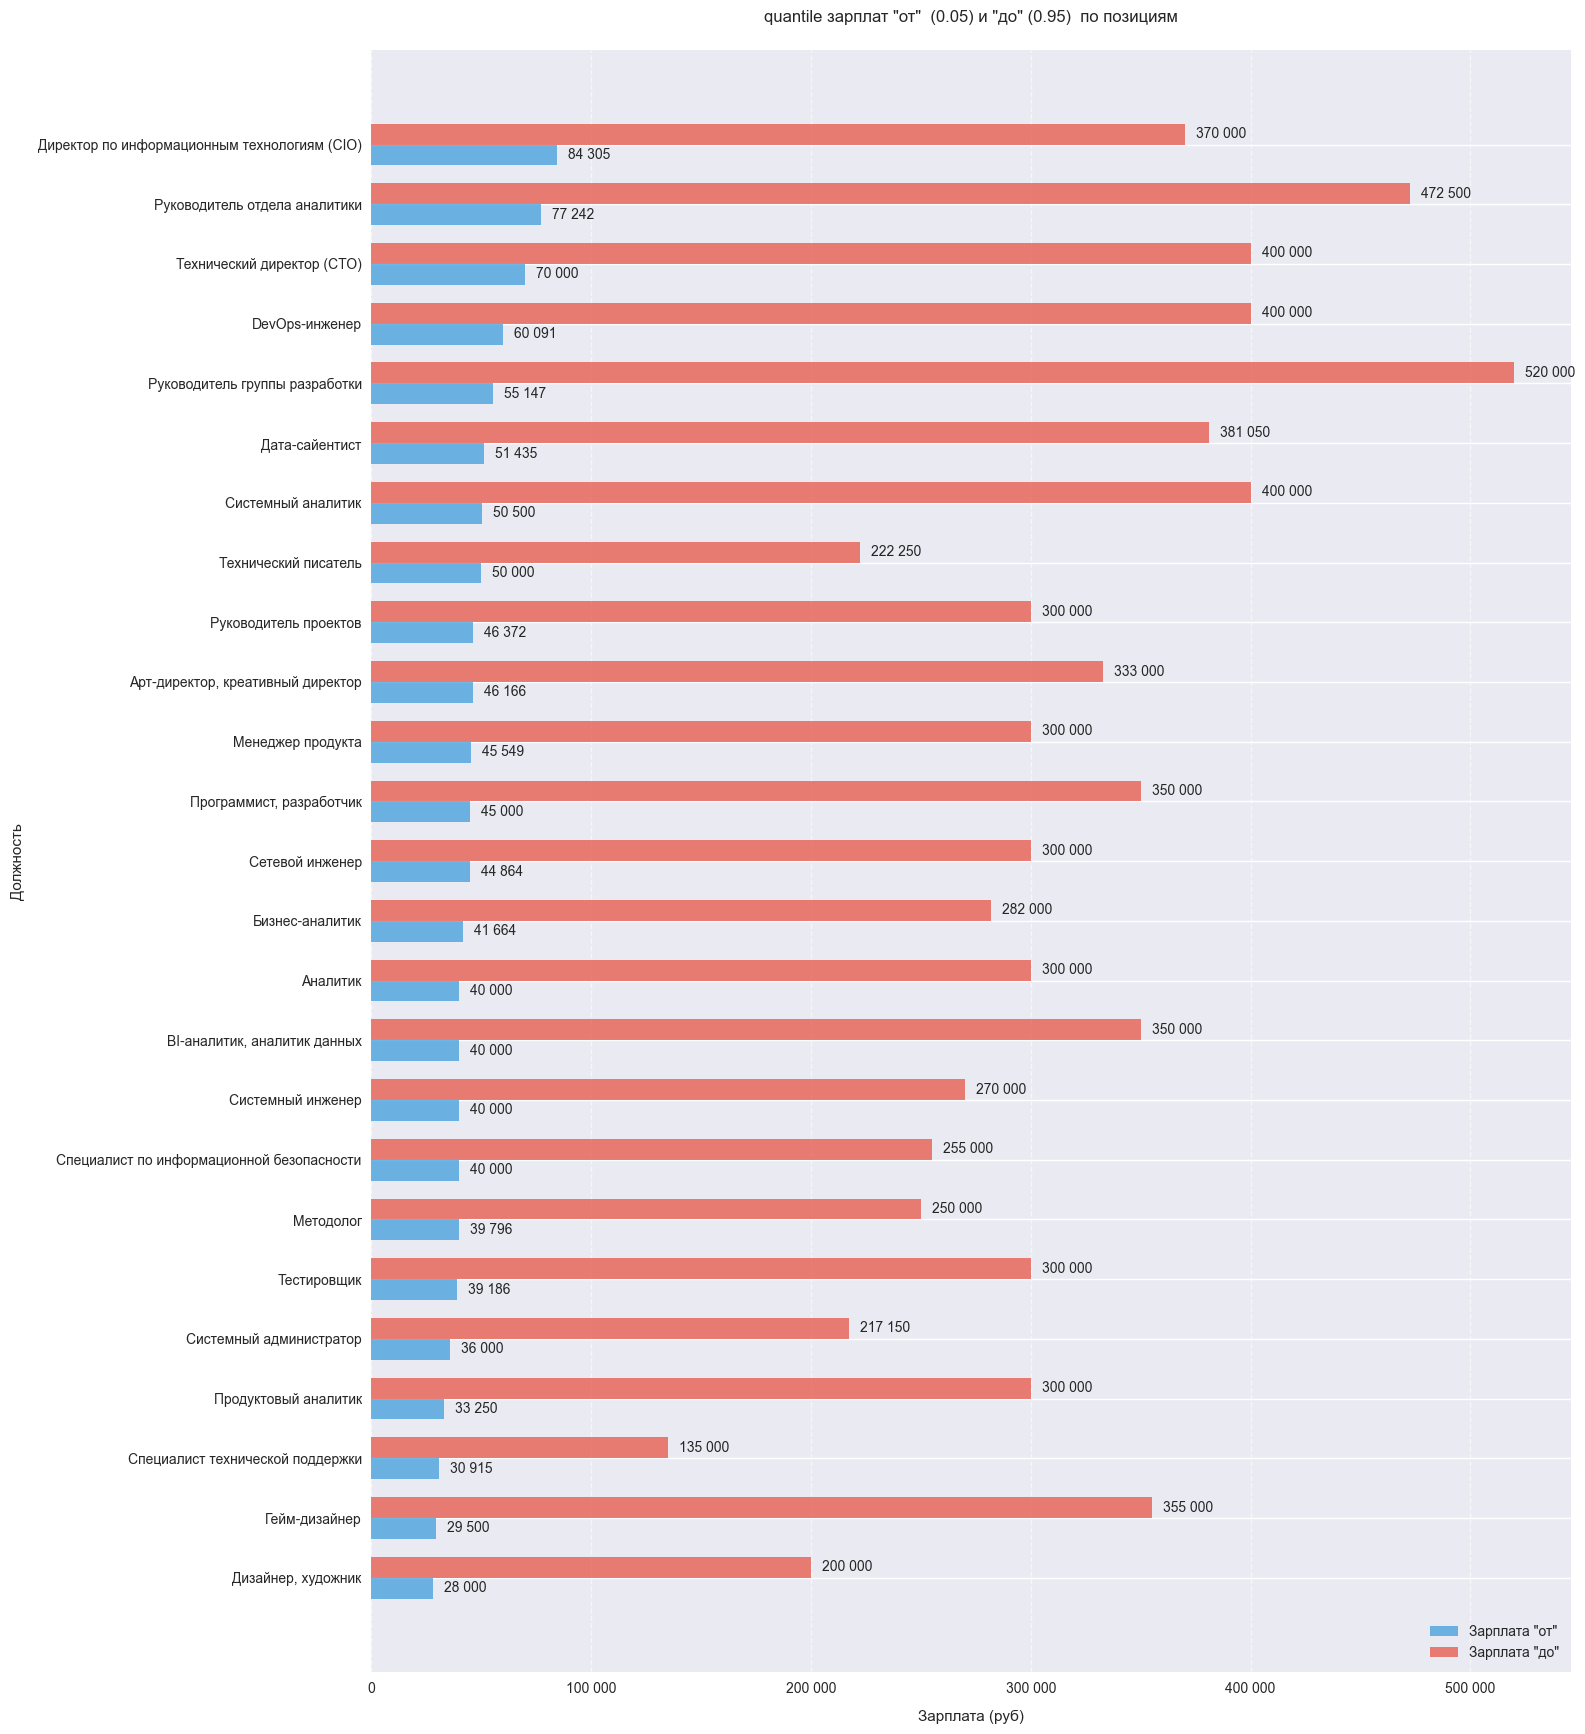

In [ ]:
# График после конвертации

# Настройки стиля
plt.style.use('seaborn')
plt.rcParams['figure.figsize'] = (16, 12)
plt.rcParams['font.size'] = 12

# Функция для форматирования чисел (100000 -> 100 000)
def thousands_formatter(x, pos):
    return '{:,.0f}'.format(x).replace(',', ' ')

thousands_format = FuncFormatter(thousands_formatter)

# Вычисляем порог для каждой позиции
def calculate_mode(series):
    try:
        return series.mean()  # mode()[0] 
    except:
        return np.nan
    
def calculate_mode_min(series):
    try:
        return series.quantile(0.05)  #quantile(0.05)
    except:
        return np.nan
    
def calculate_mode_max(series):
    try:
        return series.quantile(0.95)  #quantile(0.95)
    except:
        return np.nan    


salary_stats = data_convert_copy.groupby('position').agg({ 
    'salary from': calculate_mode_min,
    'salary to': calculate_mode_max
}).reset_index()

# Сортируем по убыванию salary from
salary_stats = salary_stats.sort_values('salary from', ascending=True)

# Создаем фигуру
fig, ax = plt.subplots(figsize=(16, len(salary_stats)*0.7))

# Параметры для столбцов
bar_height = 0.35
y_pos = np.arange(len(salary_stats))

# Рисуем горизонтальные столбцы
bars_from = ax.barh(y_pos - bar_height/2, salary_stats['salary from'], 
                   height=bar_height, color='#3498db', alpha=0.7, label='Зарплата "от"')
bars_to = ax.barh(y_pos + bar_height/2, salary_stats['salary to'], 
                 height=bar_height, color='#e74c3c', alpha=0.7, label='Зарплата "до"')

# Настройки осей
ax.set_yticks(y_pos)
ax.set_yticklabels(salary_stats['position'])
ax.xaxis.set_major_formatter(thousands_format)
ax.grid(axis='x', linestyle='--', alpha=0.6)

# Добавляем значения на столбцы
for i, (val_from, val_to) in enumerate(zip(salary_stats['salary from'], salary_stats['salary to'])):
    ax.text(val_from + 5000, i - bar_height/2, f'{val_from:,.0f}'.replace(',', ' '), 
            va='center', ha='left', fontsize=10)
    ax.text(val_to + 5000, i + bar_height/2, f'{val_to:,.0f}'.replace(',', ' '), 
            va='center', ha='left', fontsize=10)

# Легенда и заголовок
ax.legend(loc='lower right')
plt.title('quantile зарплат "от"  (0.05) и "до" (0.95)  по позициям', pad=20)
#plt.title('Распределение зарплат "от" min и "до" max  по позициям', pad=20)
plt.xlabel('Зарплата (руб)', labelpad=10)
plt.ylabel('Должность', labelpad=10)
plt.tight_layout()

plt.show()

In [92]:
data_convert_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18692 entries, 71 to 53700
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   position          18692 non-null  object 
 1   date              18692 non-null  object 
 2   vacancy           18692 non-null  object 
 3   company           18692 non-null  object 
 4   city              18692 non-null  object 
 5   experience        17398 non-null  object 
 6   employment        18692 non-null  object 
 7   schedule          18692 non-null  object 
 8   salary from       18692 non-null  float64
 9   salary to         18692 non-null  float64
 10  currency          18692 non-null  object 
 11  skills            11651 non-null  object 
 12  url               18692 non-null  object 
 13  ID                18677 non-null  float64
 14  country           1294 non-null   object 
 15  industry          17383 non-null  object 
 16  text              18672 non-null  object 
 1

In [93]:
data_convert_copy = data_convert_copy.reset_index(drop=True)

In [94]:
data_convert_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18692 entries, 0 to 18691
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   position          18692 non-null  object 
 1   date              18692 non-null  object 
 2   vacancy           18692 non-null  object 
 3   company           18692 non-null  object 
 4   city              18692 non-null  object 
 5   experience        17398 non-null  object 
 6   employment        18692 non-null  object 
 7   schedule          18692 non-null  object 
 8   salary from       18692 non-null  float64
 9   salary to         18692 non-null  float64
 10  currency          18692 non-null  object 
 11  skills            11651 non-null  object 
 12  url               18692 non-null  object 
 13  ID                18677 non-null  float64
 14  country           1294 non-null   object 
 15  industry          17383 non-null  object 
 16  text              18672 non-null  object

In [ ]:
# финальный dataset
data_convert_copy.to_csv('full_data_stage_1.csv', index=False )